# <div style="text-align: center"> Implementation of ML model on Covid-19 ventilator control problem ​</div>
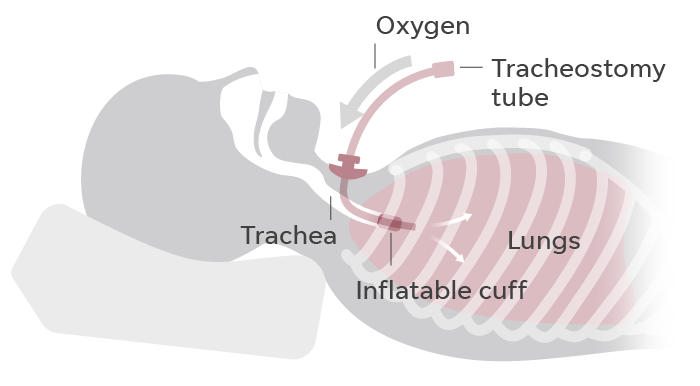
## <div style="text-align: center">Done by Group id 1 (G1)</div>
|No|Name|Student id|
|:-:|:-:|:-:|
|1.|Ong Ming Jie|AIT2104249|
|2.|Ng Zheng Jue|AIT2104248|
|3.|Chiam Yu Wei|AIT2104240|
|4.|Lim Yi Jing|AIT2104245|
|5.|Cheng Hung Xu|EEE2004045|

<a id = "Table_of_content"></a>
# Table of content
### 1. [Introduction](#Introduction)
#### &emsp; ---➤ [TPE and type of data science problem for this topic](#TPE)
### 2.  [Data analysis](#Data_Analysis)
#### &emsp; ---➤ [Analyse the properties of the dataset](#Data_Analysis1)
#### &emsp; ---➤ [Analyse the relationship among (u_in, u_out, time_step) and pressure](#Data_Analysis2)
#### &emsp; &emsp;&emsp;i)   [Box plot](#Box_plot)&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;ii) [Violin plot](#Violin_plot)
#### &emsp; &emsp;&emsp;iii) [2D graph](#2D_graph)&nbsp; &emsp; &emsp; &emsp; &emsp;iv) [Correlation heatmap](#Correlation_heatmap)
#### &emsp; ---➤ [Calculate the number of different R,C pairs](#Data_Analysis3)
#### &emsp; ---➤ [Analyse the relationship among (R, C) and pressure](#Data_Analysis4)

### 3. [Data Pre-processing](#Data_preprocessing)
#### &emsp; ---➤ [Extracted subset of dataset from original dataset](#Data_PreProcessing1)
#### &emsp; ---➤ [Scale predictor variable to range [0,1] & split data into train, test, validation](#Data_PreProcessing2)
### 4. [Create & Train the model](#Create_and_train_model)
#### &emsp; ---➤ [KNN](#KNN)
#### &emsp; ---➤ [Random Forest](#Random_Forest)
#### &emsp; ---➤ [XGBoost](#XGBoost)
#### &emsp; ---➤ [Sequential Models for Forecasting Time Series Data](#Sequential_Models_for_Forecasting_Time_Series_Data)
#### &emsp; &emsp;&emsp;i) &ensp;[ANN](#ANN)
#### &emsp; &emsp;&emsp;ii)&ensp;[Bidirectional LSTM](#Bidirectional_LSTM)
#### &emsp; &emsp;&emsp;iii)&ensp;[Bidirectional GRU](#Bidirectional_GRU) 

#### &emsp; ---➤[ Statistical Models for Forecasting Time Series Data](#Statistical_Model)
#### &emsp; &emsp;&emsp;i) &ensp;[Auto Regressive Integrated Moving Average (ARIMA)](#ARIMA) 
#### &emsp; &emsp;&emsp;ii)&ensp;[Vector Auto Regressive models (VAR)](#VAR) 
#### &emsp; ---➤[Ensemble Learning](#Ensemble_Learning)
### 5. [Conclusion](#Conclusion)
---

<a id = "Introduction"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Introduction
>The data that we used was obtained from [Kaggle -Google Brain - Ventilator Pressure Prediction](https://www.kaggle.com/competitions/ventilator-pressure-prediction/data)

&emsp; There are 3 different CSV files that are available which are (1)“train.csv”, (2)“test.csv” and (3)“sample_submission.csv”. However, we only need “train.csv” as it contains crucial data to train and test our machine learning model. In “train.csv”, we have 8 different numerical attributes, which are: id, breath_id, R, C, time_step, u_in, u_out and pressure. 

|No|Attribute|Description|
|:-:|:-:|:--|
|1.|Pressure|the class attribute|
|2.|id|a unique number to indicate a unique instance.|
|3.|Breath_id|a unique number to indicate the number of breath.|
|4.|R|a set of number to indicate how restricted the airway is.|
|5.|C|a set of number to indicate how compliant a lung is.|
|6.|time_step|the time taken for a number of breaths to be completed. |
|7.|u_in|Control input for the inspiratory solenoid valve with ranges = [0,100] <br>- 0 indicating fully closed<br>- 100 indicating fully opened. |
|8.|u_out|Control input for the exploratory solenoid valve (either 0 or 1).<br> - 0 indicates that the valve is closed.<br>- 1 indicates the valve is open |


<a id = "TPE"></a>
### ➟TPE and type of data science problem for this topic

#### Task : Create a ventilator model to perfectly cope with each patient
#### Performance Analysis: Evaluate how well the ventilator model works as in how work efficient it is in providing oxygen to the patient 
#### Experience: Train the model with data of individuals breathing normally with various attributes 


#### Type of data science problem: Regression.
After analysing the data,we can conclude that there exist some relationship between each attributes. Regression works best in explaining the relationship between two separate variables. In simple terms, regression excels in identifying how variables affect each other.

##### * * Gentle reminder: Approximately 5-6 hours is needed to rerun the whole program * *

<a id = "Data_Analysis"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Data Analysis

In [1]:
# import all the required library in data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file and return a pandas dataframe to the 'dataset'
dataset = pd.read_csv("train.csv")

<a id = "Data_Analysis1"></a>
### ➟ Analyse the properties of the dataset

In [3]:
print("The train dataset have size of",dataset.shape)
print("Each breath contains 80 id")
print("The train dataset contain of",len(dataset.breath_id.unique()),"times of breath (which is = 6036000/80)")
print("The datatype of each variable is as below:")
print(dataset.dtypes)

The train dataset have size of (6036000, 8)
Each breath contains 80 id
The train dataset contain of 75450 times of breath (which is = 6036000/80)
The datatype of each variable is as below:
id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object


In [4]:
dataset = dataset.loc[:, ['R','C','time_step','u_in','u_out','pressure']]  # remove the 'id' and 'breath_id' columns
dataset.head(5)  # Print out top five of data 

,R,C,time_step,u_in,u_out,pressure
0,20,50,0.000000,0.083334,0,5.837492
1,20,50,0.033652,18.383041,0,5.907794
2,20,50,0.067514,22.509278,0,7.876254
3,20,50,0.101542,22.808822,0,11.742872
4,20,50,0.135756,25.355850,0,12.234987


In [5]:
dataset.describe()

,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


>__From the table above, we obtain some useful information that can act as reference for analysis below:__ <br>

|Description   |R     |C     |time_step   |u_in   |u_out|pressure|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|Range|5 to 50|10 to 50|0 to 2.937238|0 to 100|0 or 1|-1.895744 to 64.82099|
|Mean|27.03618|26.08072| - |7.321615|-|11.22041|
|Std|19.59549|17.15231|0.7659778|13.43470|-|8.109703|
 
 &emsp; &emsp; &emsp; __-__ symbol means that the information is not that useful

In [6]:
# Check is there any null value in the train_dataset [False will implies that there is no NULL value]
print(dataset.isnull().to_numpy().any())

False


<a id = "Data_Analysis2"></a>
### ➟ Analyse the relationship among (u_in, u_out, time_step) and pressure
* Since attributes "R" and "C" are constant for each breath, other methods of analysis are needed.
* For relationship among (u_in, u_out, time_step) and pressure, we will analyse it based on the average value for each breath

In [7]:
time_step = dataset["time_step"].to_numpy()
u_in = dataset["u_in"].to_numpy()
u_out = dataset["u_out"].to_numpy()
pressure = dataset["pressure"].to_numpy()

In [8]:
# Variable to store the average of the breath with size (80,)
time_step_ave = np.zeros([80])
u_in_ave = np.zeros([80])
u_out_ave = np.zeros([80])
pressure_ave = np.zeros([80])

In [9]:
# Calculate the average value across each breath 
for i in range(75450):
    time_step_ave += time_step[80*i:80+80*i]
    u_in_ave += u_in[80*i:80+80*i]
    u_out_ave += u_out[80*i:80+80*i]
    pressure_ave += pressure[80*i:80+80*i]

    
# Since only 'u_out' is int64 data (while other is float64), only 'u_out' need a integer result
time_step_ave /= 75450
u_in_ave /= 75450
u_out_ave /= 75450
pressure_ave /= 75450

for i in range(len(u_out_ave)):
    if u_out_ave[i] >= 0.5:
        u_out_ave[i] = 1
    else:
        u_out_ave[i] = 0

<a id = "OUT_10"></a>

The way to calculate the average is valid


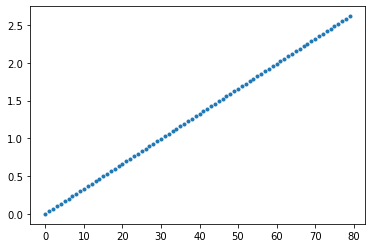

In [10]:
# Test and visualize whether the time_step_after is greater than the previous
for num in range(79):
    if time_step_ave[num+1] < time_step_ave[num]:
        print("The way to calculate the average is invalid as time_after cannot larger than time_previous")
        break
else:
    print("The way to calculate the average is valid")
    
plt.plot([i for i in range(80)],time_step_ave,'.')

In [11]:
# visualise the first 5 rows of data
# with 3 attributes : ["time_step", "u_in", "u_out"], and class ["pressure"]
dataset_ave = pd.DataFrame({"time_step":time_step_ave,
                            "u_in":u_in_ave,
                            "u_out":u_out_ave,
                            "pressure":pressure_ave})
dataset_ave.head(5)

,time_step,u_in,u_out,pressure
0,0.000000,13.910675,0.0,5.810529
1,0.033068,28.012790,0.0,6.584863
2,0.066164,23.123403,0.0,9.196083
3,0.099263,16.900345,0.0,12.901520
4,0.132355,18.797273,0.0,13.612968


<a id = "OUT_12"></a>

In [12]:
dataset_ave.describe()

,time_step,u_in,u_out,pressure
count,80.000000,80.000000,80.000000,80.000000
mean,1.307225,7.321615,0.625000,11.220408
std,0.769145,6.566265,0.487177,6.082473
min,0.000000,0.341046,0.000000,5.810529
25%,0.653520,2.884163,0.000000,6.415041
50%,1.307095,4.618396,1.000000,6.821234
75%,1.960915,11.709665,1.000000,17.749338
max,2.614803,28.012790,1.000000,21.797024


>__From the table above, we obtain some useful information that can act as reference for analysis below:__ <br>

|Description  |time_step_ave   |u_in_ave   |u_out_ave|pressure_ave|
| :-: | :-: | :-: | :-: | :-: |
|Range|0 to 2.614803|0.341046 to 28.012790	|0 or 1|5.810529 to 21.797024|
|Mean| - |7.321615|-|11.22041|
|Std|0.769145|6.566265|-|6.082473|
 
 &emsp; &emsp; &emsp; '-' means that the information is not that useful

<a id = "Box_plot"></a>
### i) Boxplot

* This part is just a representation and visualization of data from [Out[12]](#OUT_12) which help in obtain 
  - Minimum point 
  - Maximum point 
  - Q1, Q3, Interquartile range, 
  - Median 
  - detect any outliers.

<AxesSubplot:ylabel='pressure'>

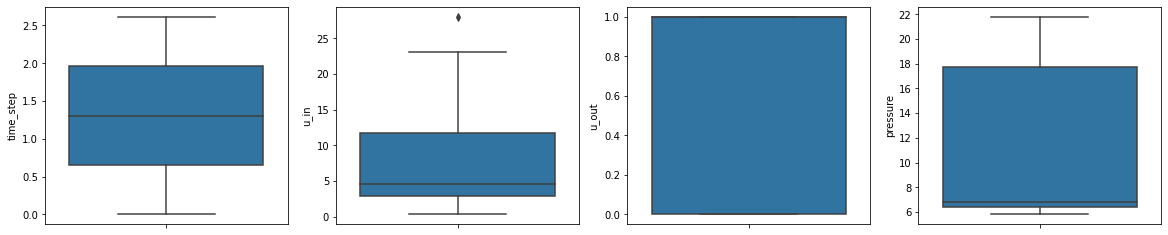

In [13]:
f, axes = plt.subplots(1,4, figsize=(20, 4))
sns.boxplot(data=dataset_ave, y="time_step",ax = axes[0])
sns.boxplot(data=dataset_ave, y="u_in",ax = axes[1])
sns.boxplot(data=dataset_ave, y="u_out",ax = axes[2])
sns.boxplot(data=dataset_ave, y="pressure",ax = axes[3])

> **Intepretation of box plot**

|time_step|u_in|u_out|pressure|
|:-:|:-:|:-:|:-:|
| Median is in the center of the box, means that data is symmetric and no outliers|Median is more towards bottom of the box. This means that the values of u_in are more condensed at the smaller values (values before 5). This can also be observed in histogram.|Since it is binary data, no useful information is given.|Median is very close to the bottom of the box. This means that the values of pressure are more condensed at the smaller values (values before 7)|

<a id = "Violin_plot"></a>
### ii) Violin plot

Violin plot is a method of plotting numeric data and can be considered as a combination of the box plot with a kernel density plot, which also show peaks in the data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable. Violin plots are able to visualize large datasets in a better way compare to other plot such as boxplots.

Violin plots not only can show the summary statistics and density of each variable, it also shows the entire distribution of the data. This is helpful when dealing with multimodel data such as a distribution with more than one peak.

##### Way to read a violin plot

<div>
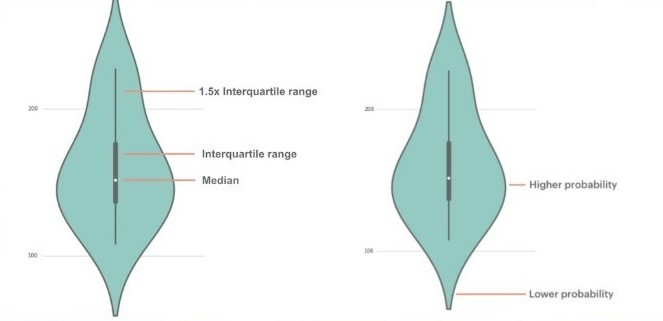
</div>


|Left figure|Right figure|
|:--|:--|
|1. Median (a white dot on the violin plot)|4 .On each side of the black line is a kernel density estimation <br>to show the distribution shape of the data.|
|2. Interquatile range (the black bar in the center of violin)| - Skinnier sections ⇒ lower probability that members <br>&emsp; of the population will take on the given value|
|3. the thin black line represents the rest of the distribution, except for points that are <br>determined to be “outliers” using a method that is a function of the interquartile range.| - Wider sections ⇒ higher probability that members <br>&emsp;of the population will take on the given value|

<AxesSubplot:ylabel='u_out'>

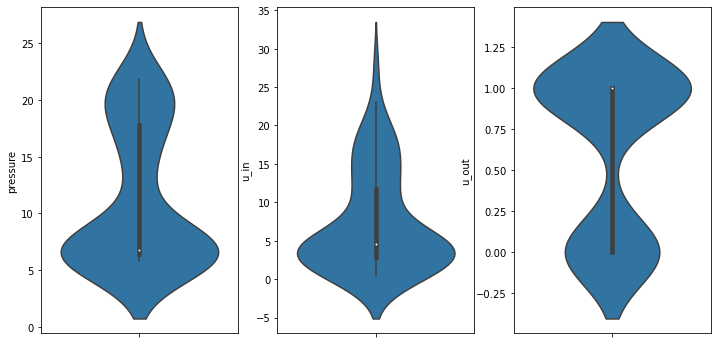

In [14]:
# Violin plot
f, axes = plt.subplots(1, 3, figsize = (12,6))

sns.violinplot(y = 'pressure', data = dataset_ave, ax = axes[0])
sns.violinplot(y = 'u_in', data = dataset_ave, ax = axes[1])
sns.violinplot(y = 'u_out', data = dataset_ave, ax = axes[2])

> **Interpretation of Violin Plot**

|Description|Pressure|u_in|u_out|
|:-:|:--|:--|:--|
|High density <br>area|Around 5.0 to 8.0 ⇒ (low pressure) <br> - Happen when air go out from lungs <br><br>Around 18.5 to 21.5 ⇒ (high pressure)<br> - Happen when air enter lungs|Around 2.5 to 5.5 ⇒ The inspiratory solenoid valve nearly close <br><br>Around 9 to 22.5 ⇒ The inspiratory solenoid valve open more <br>compare than before<br><br> * The inspiratory solenoid valve 'close' more than 'open'|Around 1 ⇒ The exploratory solenoid valve is on <br> Around 0 ⇒ The exploratory solenoid valve is off <br><br> * The exploratory solenoid valve is 'on' more than 'off' |
|Abnormal <br>data|No|There are a few extraordinary high u_in values on <br>the upper side|No|
|Median <br>(Obtain from table above)|6.82|4.62|1|

* All median is located around the higer probability density area
* Since (low pressure is at high density area) and (inspiratory solenoid valve 'close' more than 'open') and (exploratory solenoid valve is 'on' more than 'off'), we can conclude that __the time 'the air enter the lungs' is less than the time 'the air out from the lungs'__

<a id = "2D_graph"></a>
### iii) 2D Graph

* To **observe** and **analyse** the relationship between them in an easier way 
* To **compare** and **contrast** the graphs
* To show us how the attributes **varies** as the time goes by

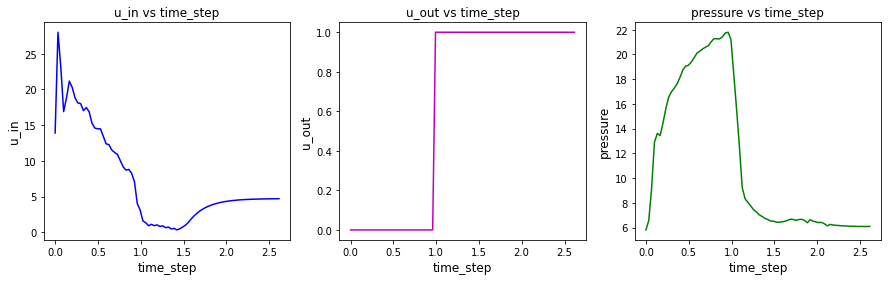

In [15]:
# plot 2D graph
def plot_2D(n,y,ylabel,col):
    ax1[n].plot(time_step_ave, y, color = col)
    ax1[n].set_title(f'{ylabel} vs time_step', fontsize = 12)
    ax1[n].set_xlabel('time_step', fontsize = 12)
    ax1[n].set_ylabel(f'{ylabel}', fontsize = 12)

# 2D graphs
f1,ax1=plt.subplots(1,3, figsize = (15,4))  

plot_2D(0, u_in_ave, 'u_in', col = 'b')
plot_2D(1, u_out_ave, 'u_out', col='m')
plot_2D(2, pressure_ave, 'pressure', col='g')

<a id = "Interpretation_of_2D_graph"></a>
> **Intepretation of 2D graph above**

|Graph of u_in against time_step|Graph of u_out against time_step|Graph of pressure against time_step|
|:--|:--|:--|
|In the beginning, the u_in values rise to a high point of around 26.0 followed by a steep decent to approximately 0 at the time_step of 1.5.|The u_out value starts from the value of 0 and remain constant until time_step of 1.0. |The pressure spiked in the beginning and achieved its highest around 22.0 during time_step value near 1.0.|
|After that, it gradually increases to the value of around 5 and remain there until the end of time_step.|Then, it increases to 1 and remain the same for the remaining time_step.|Then its pressure value plummets to 6.0 and not much huge movements is observed until the end of time_step.|
|* The values rise to a high point of 26.0 and decent significantly until time_step of roughly 1.5 before recovering toward steady points of 5.0.|* It has values of 0 before time_step of 1.0 and it  changes to 1 after that.|* The values rise significantly to the peak until time_step of 1.0 before plunging to around 6.0 and remain steady.|

* After time step 1.0, (u_out is 1) and (u_in very near to 0), the pressure drop significantly (This can be shown by the following graph) 
* This show that __there must exist some relationship among the three variable__

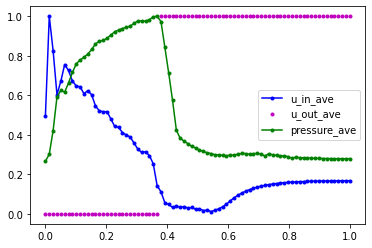

In [16]:
# Since all the data is positive, we can scale the data to range between 0 to 1 by dividing the max value
time_step_ave01 = time_step_ave / np.max(time_step_ave)
u_in_ave01 = u_in_ave / np.max(u_in_ave)      
u_out_ave01 = u_out_ave / np.max(u_out_ave)       # Since it is binary data and max value of it is 1, not change is made for this attribute
pressure_ave01 = pressure_ave/ np.max(pressure_ave)

# Visualization of three attributes in the same graph
plt.plot(time_step_ave01, u_in_ave01, '.-', label = 'u_in_ave', color = 'b')
plt.plot(time_step_ave01, u_out_ave01, '.', label = 'u_out_ave', color = 'm')
plt.plot(time_step_ave01, pressure_ave01,'.-', label = 'pressure_ave', color = 'g')
plt.legend()
plt.show()

> __Combination of three attributes__
* We can observe a huge variation in the graph when it reached the time_step of about 0.4. 
* Thus, the graph can be seperated into two by a vertical line passing through time_step of 0.4.

|First Part:| u_in  | u_out | pressure|
| --- | :-: | :-: |:-: |
|↳|Irregular increase and decrease of the curve|remain 0|gradually increasing until reach maximum value|
|__Second Part:__|  | | |
|↳|remains around a very low value|changes to 1.0 for the remaining time_step|drop drastically and maintains at the value of about 0.3|


##### Take note that : The values in these two parts may not be the actual values the respective attributes because scaling is done on the data for better visualisation.

<a id = "Correlation_heatmap"></a>
### iv) Correlation heatmap
* From the 2D graph, we have made the assumption that there exist some relationship among the three variable (u_in, u_out, pressure)
* Even though that kind of relationship may not shown by the correlation heatmap (because of sudden increase/decrease in values of the attribute), we will like to try this out to observe whether there presents a positive/negative correlation between each attributes.

<AxesSubplot:>

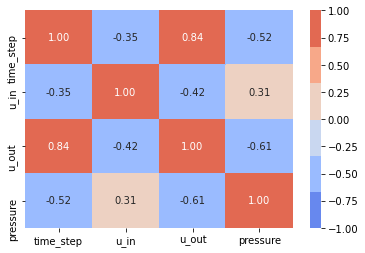

In [17]:
colormap = sns.color_palette("coolwarm") # Creating colormap
dataset_withoutRC = dataset.loc[:, ['time_step','u_in','u_out','pressure']]
sns.heatmap(dataset_withoutRC.corr(),vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = colormap)

|Correlation|High (+) correlation<br>(>0.8)|Low (+) Correlation<br>(between 0.5 & 0.8)|High (-) Correlation<br>(<-0.8)|Low (-) Correlation<br>(between -0.5 & -0.8)|
| :-: | :-: | :-:| :-: | :-:|
||* time_step and u_out (0.84)|-|-|* u_out and pressure (-0.61)<br>* time_step and pressure (-0.52)|

<a id = "Data_Analysis3"></a>
### ➟ Calculate the number of different R,C pairs

In [18]:
#Find unique values of R and C
print(f"Unique values of R : {dataset.R.unique()}")
print(f"Unique values of C : {dataset.C.unique()}")

Unique values of R : [20 50  5]
Unique values of C : [50 20 10]


> From this, we know that there are total 6 combination of the R_C pair (5_10, 5_20, 5_50, 20_10, 20_20, 20_50, 50_10, 50_20, 50_50)  

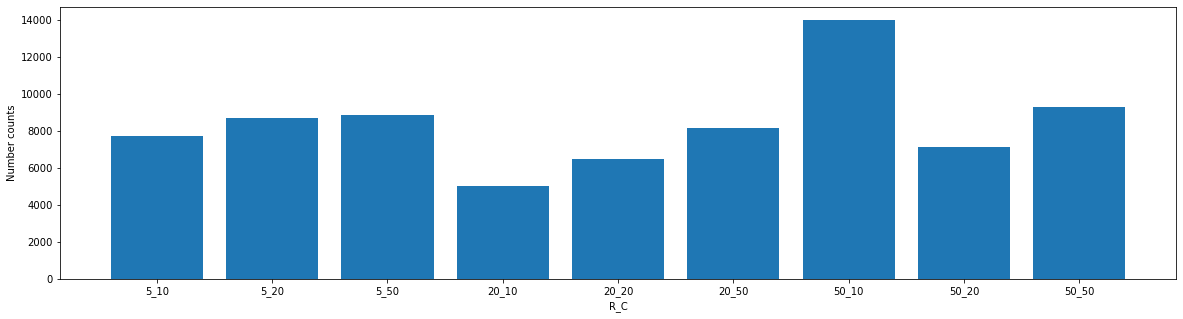

In [19]:
# Count the number of different R,C pairs and plot a bar chart for visualisation
R = dataset["R"].to_numpy()
C = dataset["C"].to_numpy()

dic_count = {"5_10":0,"5_20":0,"5_50":0,
             "20_10":0,"20_20":0,"20_50":0,
             "50_10":0,"50_20":0,"50_50":0}

for i in range(75450):
    dic_count[str(R[i])+"_"+str(C[i])] += 1

plt.figure(figsize = (20,5))
y = np.array(list(dic_count.values()))
x = np.array(list(dic_count.keys()))
plt.bar(x, y)
plt.xlabel('R_C')
plt.ylabel('Number counts')
plt.show()

<a id = "Data_Analysis4"></a>
### ➟ Analyse the relationship among (R,C) and pressure

Given that:

<u><b>Description from R and C:</b></u>

_R : Intuitively, one can imagine blowing up a balloon through a straw. We can change R by changing the diameter of the straw, with higher R being harder to blow._

_C : Intuitively, one can imagine the same balloon example. We can change C by changing the thickness of the balloon’s latex, with higher C having thinner latex and easier to blow._

>From the statement above, we obtain following hypothesis:
   1. With high value of R, higher pressure is needed to supply oxygen into the lungs as oxygen has difficulty entering the lungs.
   2. With high value of C, smaller pressure is needed to supply oxygen into the lungs as oxygen has less resistance entering the lungs.

>However, after each round of breathing, R and C values may change or remain constant, so we obtain the following __4 hypothesis__:
   1. When R remain and C increase for next breath, the overall pressure needed to be lower
   2. When R remain and C decrease for next breath, the overall pressure needed to be higher
   3. When C remain and R increase for next breath, the overall pressure needed to be higher. 
   4. When C remain and R decrease for next breath, the overall pressure needed to be lower.
    

In [20]:
# variables to store pressure average value and count
x_press_ave = np.zeros([4,80])
y_press_ave = np.zeros([4,80])
count = np.zeros([4])

R = dataset["R"].to_numpy()
C = dataset["C"].to_numpy()

In [21]:
# Sum up all 2 continuous pair where R constant , C(in/decrease) and R(in/decrease), C(constant)
for i in range(75449):
    # Store pressure value when R constant and C increase
    if R[i] == R[i+80] and C[i] < C[i+80]:
        count[0] += 1
        x_press_ave[0] += pressure[80*i:80+80*i]
        y_press_ave[0] += pressure[80*(i+1):80+80*(i+1)]
        
    # Store pressure average value when R constant and C decrease
    elif R[i] == R[i+80] and C[i] > C[i+80]:
        count[1] += 1
        x_press_ave[1] += pressure[80*i:80+80*i]
        y_press_ave[1] += pressure[80*(i+1):80+80*(i+1)]
        
    # Store pressure value when R increase and C constant
    elif R[i] < R[i+80] and C[i] == C[i+80]:
        count[2] += 1
        x_press_ave[2] += pressure[80*i:80+80*i]
        y_press_ave[2] += pressure[80*(i+1):80+80*(i+1)]
    
    # Store pressure value when R decrease and C constant
    elif R[i] > R[i+80] and C[i] == C[i+80]:
        count[3] += 1
        x_press_ave[3] += pressure[80*i:80+80*i]
        y_press_ave[3] += pressure[80*(i+1):80+80*(i+1)]
        

print("The number of the count is as following: ",count)

# Calculate the average value for each pressure
for i in range(4):
    x_press_ave[i] /= count[i]
    y_press_ave[i] /= count[i]

The number of the count is as following:  [7840. 6960. 9840. 9049.]


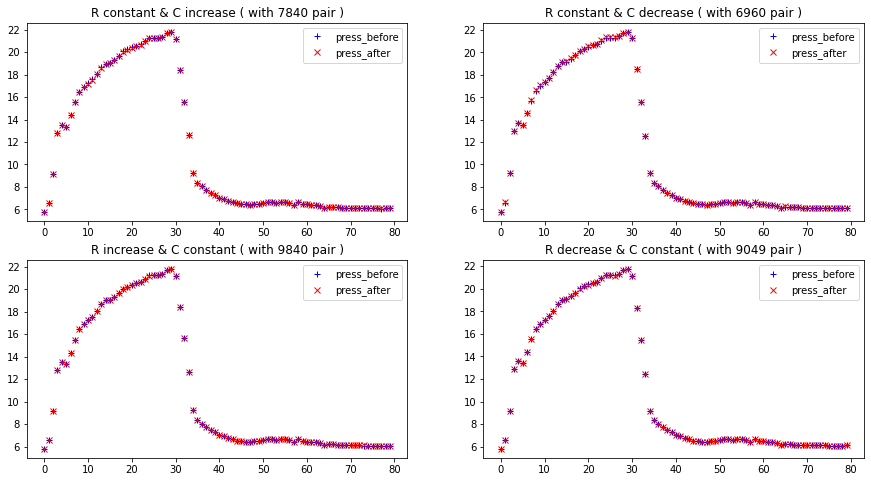

In [22]:
# Visualize the difference by 2D graph
def plot_pressure_ave(num,x,y,title,ax):
    ax[x][y].plot(range(80), x_press_ave[num], '+', label = 'press_before', color = 'b')
    ax[x][y].plot(range(80), y_press_ave[num], 'x', label = 'press_after', color = 'r')
    ax[x][y].set_title(title)
    ax[x][y].legend()


f,ax=plt.subplots(2,2, figsize = (15,8))  
plot_pressure_ave(0,0,0,f"R constant & C increase ( with {int(count[0])} pair )",ax)    
plot_pressure_ave(1,0,1,f"R constant & C decrease ( with {int(count[1])} pair )",ax)   
plot_pressure_ave(2,1,0,f"R increase & C constant ( with {int(count[2])} pair )",ax)   
plot_pressure_ave(3,1,1,f"R decrease & C constant ( with {int(count[3])} pair )",ax)   

> From the 2D graph, we cannot see the significant change after change of R or C value

In [23]:
# Compute the mean
mean_press_before = np.array([np.mean(x_press_ave[0]),np.mean(x_press_ave[1]),np.mean(x_press_ave[2]),np.mean(x_press_ave[3])])
mean_press_after = np.array([np.mean(y_press_ave[0]),np.mean(y_press_ave[1]),np.mean(y_press_ave[2]),np.mean(y_press_ave[3])])
df_mean = pd.DataFrame({"R constant & C increase":[mean_press_before[0], mean_press_after[0]],
                        "R constant & C decrease":[mean_press_before[1], mean_press_after[1]],
                        "R increase & C constant":[mean_press_before[2], mean_press_after[2]],
                        "R decrease & C constant":[mean_press_before[3], mean_press_after[3]]},
                      index = ["Mean (Pressure before)","Mean (Pressure after)"])
df_mean.head(2)

,R constant & C increase,R constant & C decrease,R increase & C constant,R decrease & C constant
Mean (Pressure before),11.205435,11.243096,11.200245,11.197014
Mean (Pressure after),11.198680,11.251825,11.198603,11.192762


#### Interpretation from the table above:

|When|Mean|
|:-:|:-:|
|R constant & C increase|Slightly decrease|
|R constant & C decrease|Slightly increase|
|R increase & C constant|Slightly decrease|
|R decrease & C constant|Slightly decrease|

* Except when R decrease & C constant, all other conditions fulfill the assumption that we made previously (But only slight changes)

In [24]:
# Check the num of difference between each value in x_press_ave and y_press_ave
print("When R constant & C increase, num of id that press_after < press_before is",np.count_nonzero(x_press_ave[0] > y_press_ave[0]))
print("When R constant & C decrease, num of id that press_after > press_before is",np.count_nonzero(x_press_ave[1] < y_press_ave[1]))
print("When R increase & C constant, num of id that press_after < press_before is",np.count_nonzero(x_press_ave[2] > y_press_ave[2]))
print("When R decrease & C constant, num of id that press_after > press_before is",np.count_nonzero(x_press_ave[3] < y_press_ave[3]))

When R constant & C increase, num of id that press_after < press_before is 37
When R constant & C decrease, num of id that press_after > press_before is 70
When R increase & C constant, num of id that press_after < press_before is 37
When R decrease & C constant, num of id that press_after > press_before is 9


In [25]:
# Check is there a significant increase when R constant & C decrease
print("When R constant & C decrease,\n" +
      "num of id that press_after - press_before > 0.01 is",np.count_nonzero(y_press_ave[1] - x_press_ave[1] > 0.01 ))

When R constant & C decrease,
num of id that press_after - press_before > 0.01 is 26


### Overall conclusion for analysis attibute R and C
* the assumptions made above are wrong
* changes in value of 'R' and 'C' does not contribute in predicting 'pressure' 
* It is because when one variable change (decrease/increase), and another variable remain constant, there is no significant increase/decrease of 'pressure'
* Therefore, we will drop the attribute 'R' and 'C' and will not use it in predicting 'pressure'

#### Additionally, since 
- 'time_step' (only indicates the time for each breath) and 
- there is not much variance between (time_step[i] at breath j) and (time_step[i] at breath k), for any i in [0,80] and j!=k (this can be visualized at [Out[10]](#OUT_10))
- we can conclude that 'time_step' also does not contribute in predicting 'pressure'
- Therefore, we will also drop the attribute 'time step'

#### Furthermore,
- from [Interpretation of 2D graph](#Interpretation_of_2D_graph), we can observe that there exists some relationships among the three variable (u_in, u_out, pressure), thus we will mainly use them as assisting tools to predict the pressure

In [26]:
# Drop out the R and C attribute and time step
dataset = dataset.loc[:, ['u_in','u_out','pressure']]

<a id = "Data_preprocessing"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Data Pre-processing

<a id = "Data_PreProcessing1"></a>
### ➟ Extracted subset of dataset from original dataset
* Since our dataset is big (contains 6,036,000 data), it will definitely contain outliers. The negative pressure value in dataset is abnormal as it means that the air will flow from the patients to machine, which is not logically correct. We will try to remove all breaths with negative pressure value if the proportion of it is very low.

In [27]:
dataset = dataset.to_numpy()
list_row = []  # list of row that need to delete

# Detect breath_id with negative pressure
for breath_id in range(75450): # For each breath
    if np.min(dataset[breath_id*80:breath_id*80+80,2]) < 0:
        for i in range(80):
            list_row.append(breath_id*80+i)

print("Num of rows that need to delete =",len(list_row))
print("Num of breaths that need to delete =",len(list_row)/80)

Num of rows that need to delete = 5840
Num of breaths that need to delete = 73.0


* From above, we know that we have a total of 75450 breath. 73/75450 = 0.00965 is only a very small proportion. (Only about 1% of data). So that we will remove all breath with negative pressure value

In [28]:
dataset = np.delete(dataset,list_row,axis=0)
print(dataset.shape)

(6030160, 3)


In [29]:
# Check the minimum value of the pressure
print(np.min(dataset[:,2]))

0.0024136326181828593


* We will only use subset (10000 breath) of the dataset. By doing so, we can:
  - reduce the run time for training the model
  - try more & different hyperparameters on the model
* We believe that good hyperparameter settings obtained from the subset of dataset is also a good hyperparameter settings for entire dataset. It is because, in practical, if we have a data set which consist of billions or more data, it is impossible to use all of them in hyperparameter tuning.

In [30]:
dataset = dataset[:10000*80,:]
print(dataset.shape)

(800000, 3)


In [31]:
# Make it to become pandas dataframe
dataset = pd.DataFrame(dataset,columns = ['u_in','u_out','pressure'])
dataset.head(5)

,u_in,u_out,pressure
0,0.083334,0.0,5.837492
1,18.383041,0.0,5.907794
2,22.509278,0.0,7.876254
3,22.808822,0.0,11.742872
4,25.355850,0.0,12.234987


<a id = "Data_PreProcessing2"></a>
### ➟ Scale predictor variable to range [0,1] & split data into train, test, validation
* In this case, we will not scale the pressure to avoid doing an extra step to convert predicted values back to original scale after we obtained the predicted values from created model.
* Note that u_out is within the range of 0 and 1, therefore no changes of value will be done.
* Furthermore, we will store the max & min values of u_in and u_out, which is used to process our data when there is a new query before feeding into the model.
* Split the dataset to 
  - __train (70%)__ [For training], __test (20%)__ [For testing] and __validation (10%)__ [For hyperparameter tuning] 

In [32]:
# Scale the data to range [0,1]
dic_min_max = {} # A dictionary to save the min and max value

for column in ['u_in','u_out']:
    dic_min_max.setdefault(column,[]).append(dataset[column].min())
    dic_min_max[column].append(dataset[column].max())
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

print(dic_min_max)

{'u_in': [0.0, 100.0], 'u_out': [0.0, 1.0]}


In [33]:
dataset.head(5)

,u_in,u_out,pressure
0,0.000833,0.0,5.837492
1,0.183830,0.0,5.907794
2,0.225093,0.0,7.876254
3,0.228088,0.0,11.742872
4,0.253559,0.0,12.234987


In [34]:
# Split the dataset to 70% train, 20% test, 10% validation  
train_dataset = dataset[: int(dataset.shape[0]*0.70)].to_numpy()
test_dataset1 = dataset[int(dataset.shape[0]*0.70):int(dataset.shape[0]*0.90)].to_numpy()
valid_dataset = dataset[int(dataset.shape[0]*0.90):].to_numpy()

x_train,y_train = train_dataset[:,:2],train_dataset[:,2]
x_test1, y_test1 = test_dataset1[:,:2],test_dataset1[:,2]
x_valid, y_valid = valid_dataset[:,:2],valid_dataset[:,2]

print("For train dataset: ",x_train.shape,y_train.shape)
print("For test dataset: ",x_test1.shape,y_test1.shape)
print("For validation dataset: ",x_valid.shape,y_valid.shape)

For train dataset:  (560000, 2) (560000,)
For test dataset:  (160000, 2) (160000,)
For validation dataset:  (80000, 2) (80000,)


<a id = "Create_and_train_model"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Create & Train the model

#### In our report, we will create and train __8 models__ which are
- (1) KNN (2) Random Forest (3) XGBoost
- (4) ANN (5) LSTM (6) GRU &emsp; [3 of them are sequential model]
- (7) ARIMA (8) VAR&emsp;&emsp;&emsp;&emsp;&emsp; [2 of them are statistical model]

#### We will use evaluation metric 'mean absolute error' (mae) to evaluate our model 
- The reason we choose mae rather than mse (mean square error) is because, since our predicted class 'pressure' is numerical value, when our model is predicting well ( |y_predict - y_actual| < 1 ), the error calculated by mse will become way smaller that its actual value [$x^2$ <= x for x in (0,1)] but mae will not.
- Besides, since we will do ensemble learning on this 8 models, we will standardize the evaluation metric which is __mae__ for all the models.

#### Other
- We use validation dataset (x_valid, y_valid) for hyperparameter tuning of the model
- In ensemble learning, the ratio of contribution of the model in predicting 'pressure' is based on its performance on the validation dataset (lower mae). The lower the mae of the model obtained in validation dataset, the higher the ratio of contribution of the model in predicting 'pressure'

In [35]:
def mae(pred_y,actual_y):
    return np.sum(np.absolute(pred_y - actual_y))/actual_y.shape[0]

<a id = "KNN"></a>
### ➟ KNN

KNNRegressor is based on the idea of K-Nearest Neighbours (KNN). In KNN, it stores all available data and then classifies a new data/instance based on the similarity to the original data. For regression, it finds the values closest to the n_neighbours that are nearest to the data that will be predicted. 

* There are 2 different parameters that we will look at:
|Hyperparameter|Selection|Explanation|
|:-:|:--|:--|
|n_neighbors|[10, 30, 50, 70, 100]|number of neighbours observed|
|weights|['distance', 'uniform']|weights used by the model (distance or uniform)|


* We perform parameter tuning using __Grid search__ to find the suitable values for these 2 parameters. 
* Grid search will test all different combination of values available.
* Here, we will set 5 'n_neighbors' values and 2 'weights' values, that means there will be 5*2 = 10 different subsets of parameters that the model will train on. 
* At last, we will choose the best set of parameters out of the 10 based on performance on validation dataset, and we will use this subset of parameter for our KNN model.

In [36]:
from pprint import pprint
from sklearn.model_selection import ParameterSampler

n_neighbors = [10, 30, 50, 70, 100]
weights = ['distance', 'uniform']

# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights, }
pprint(random_grid)

{'n_neighbors': [10, 30, 50, 70, 100], 'weights': ['distance', 'uniform']}


In [37]:
KNN_random = ParameterSampler(param_distributions = random_grid, n_iter = 10)
pprint(list(KNN_random))

[{'n_neighbors': 10, 'weights': 'distance'},
 {'n_neighbors': 10, 'weights': 'uniform'},
 {'n_neighbors': 30, 'weights': 'distance'},
 {'n_neighbors': 30, 'weights': 'uniform'},
 {'n_neighbors': 50, 'weights': 'distance'},
 {'n_neighbors': 50, 'weights': 'uniform'},
 {'n_neighbors': 70, 'weights': 'distance'},
 {'n_neighbors': 70, 'weights': 'uniform'},
 {'n_neighbors': 100, 'weights': 'distance'},
 {'n_neighbors': 100, 'weights': 'uniform'}]


In [38]:
from sklearn.neighbors import KNeighborsRegressor

vld_lst = []
train_lst = []
n_neighbors_lst = []
weight_lst = []

for dic in KNN_random:
    n = dic.get('n_neighbors')
    w = dic.get('weights')
    
    KNN = KNeighborsRegressor(n_neighbors = n, weights = w)
    KNN.fit(x_train, y_train)
    
    KNN_train_predict = KNN.predict(x_train)
    KNN_valid_predict = KNN.predict(x_valid)
    
    training_error =  mae(y_train, KNN_train_predict)
    valid_error = mae(y_valid, KNN_valid_predict)
    
    n_neighbors_lst.append(n)
    weight_lst.append(w)
    train_lst.append(training_error)
    vld_lst.append(valid_error)

In [39]:
df_KNN = pd.DataFrame({"n_neighbors":n_neighbors_lst, "weight":weight_lst, "mse_train":train_lst, "mse_valid":vld_lst})
df_KNN.head(10)

,n_neighbors,weight,mse_train,mse_valid
0,10,distance,1.284280,3.892217
1,10,uniform,3.523558,3.741344
2,30,distance,1.253242,3.802325
3,30,uniform,3.586548,3.655815
4,50,distance,1.394022,3.914002
5,50,uniform,3.744692,3.774447
6,70,distance,1.299246,3.804481
7,70,uniform,3.658246,3.667973
8,100,distance,1.263477,3.756424
9,100,uniform,3.627789,3.624902


In [40]:
KNN_valid_mae =  np.min(vld_lst)
print("Best parameters for KNN Model:", list(KNN_random)[np.argmin(vld_lst)])
print("Best performance mae on validation dataset:", KNN_valid_mae)                                                                             

Best parameters for KNN Model: {'weights': 'uniform', 'n_neighbors': 100}
Best performance mae on validation dataset: 3.6249017536724635


<a id = "KNN_test"></a>

In [41]:
# Make prediction on testing data
KNN = KNeighborsRegressor(n_neighbors = list(KNN_random)[np.argmin(vld_lst)]['n_neighbors'], weights = list(KNN_random)[np.argmin(vld_lst)]['weights'])
KNN.fit(x_train, y_train)
KNN_test_pred = KNN.predict(x_test1)
KNN_test_mae = mae(KNN_test_pred,y_test1)
print("KNN have the mae:",KNN_test_mae,"on the test dataset")

KNN have the mae: 3.6477122777819146 on the test dataset


<a id = "Random_Forest"></a>
### ➟ Random Forest

* Random Forest Regressor is a machine learning model that fits a number of decision trees on different subsamples of a dataset.
* It uses the idea of ensemble learning, meaning it will combine the results of multiple decision trees to make a final decision, making it more accurate than testing it on just one tree.


* Within this RandomForestRegressor model, we have a few different parameters that we need to tune in order to obtain the best results from our predictions. There are 6 different parameters that we will look at:
|Hyperparameter|Selection|Explanation|
|:-:|:--|:--|
|max_depth|[25, 50, 100]|Determines maximum depth of tree|
|bootstrap|[True, False]|If false, entire dataset is used for training. If true, subsets are used|
|min_samples_leaf|[2, 6, 10]|Minimum number of samples required to form a leaf node|
|max_leaf_nodes|[10, 30, 50]|Will obtain best nodes that reduce impurity as much as possible|
|max_features|[1, 2]|Number of features to consider when looking for the best split (1 or 2 since we have only 2 feature)|
|n_estimators|[100, 150, 200]|Number of trees used in the model|


* In order to find the best values for each parameter, we perform __Random Search__. 
* Random search chooses different values for each parameter that we have created. 
* Once it has chosen a value for each parameter, the model will use these values to train and test on the training dataset. 
* Here, we have set the number of iterations = 10, meaning there will be 10 different subsets of parameters that the model will train on. 
* At last, same as KNN, we will choose the best set of parameters out of the 10 based on performance on validation dataset, and we will use this subset of parameters for our Random Forest model.

In [42]:
max_depth = [25, 50, 100] # Maximum number of levels in tree
bootstrap = [True, False] # Method of selecting samples for training each tree
min_samples_leaf = [2, 6, 10] # Minimum number of samples required at each leaf node
min_samples_split = [10, 30, 50] # Minimum number of samples required to split a node
max_features = [1, 2] # Number of features to consider at every split
n_estimators = [100, 150, 200] # Number of trees in random forest


# Create the random grid
random_grid_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid_forest)

{'bootstrap': [True, False],
 'max_depth': [25, 50, 100],
 'max_features': [1, 2],
 'min_samples_leaf': [2, 6, 10],
 'min_samples_split': [10, 30, 50],
 'n_estimators': [100, 150, 200]}


In [43]:
RF_random = ParameterSampler(param_distributions = random_grid_forest, n_iter = 10)

a = 1

for dic in RF_random:
    if a:
        set_parameter_key = list(dic.keys())
        set_parameter_value = [list(dic.values())]
        a = 0
    else:
        set_parameter_value = np.vstack([set_parameter_value, list(dic.values())])
print(set_parameter_key)
print(set_parameter_value)

['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'bootstrap']
[[150  30   2   2  50   0]
 [150  30  10   2  50   0]
 [150  50   6   2  50   0]
 [150  10   6   2 100   0]
 [200  10  10   1 100   1]
 [100  50  10   1 100   0]
 [200  30   6   1  25   0]
 [100  30   6   2  50   0]
 [150  50   6   1  50   1]
 [150  30   6   2  25   0]]


In [44]:
from sklearn.ensemble import RandomForestRegressor

train_lst2 = []
vld_lst2 = []

for n_estimators, min_samples_split, min_samples_leaf, max_features, max_depth, bootstrap in set_parameter_value:
    
    RF_model = RandomForestRegressor(n_estimators = n_estimators, min_samples_split = min_samples_split, 
                                     min_samples_leaf = min_samples_leaf, max_features = max_features, 
                                     max_depth = max_depth, bootstrap = bootstrap)
    RF_model.fit(x_train, y_train)

    RF_train_predict = RF_model.predict(x_train)
    RF_valid_predict = RF_model.predict(x_valid)
    
    training_error =  mae(y_train, RF_train_predict)
    valid_error = mae(y_valid, RF_valid_predict)
    
    train_lst2.append(training_error)
    vld_lst2.append(valid_error)

In [45]:
df_RF = pd.DataFrame({"n_estimators":set_parameter_value[:,0], "min_samples_split":set_parameter_value[:,1],
                       "min_samples_leaf":set_parameter_value[:,2], "max_features":set_parameter_value[:,3],
                       "max_depth":set_parameter_value[:,4], "bootstrap":set_parameter_value[:,5],
                       "mse_train":train_lst2, "mse_valid":vld_lst2})
df_RF.head(10)

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap,mse_train,mse_valid
0,150,30,2,2,50,0,3.326153,3.840744
1,150,30,10,2,50,0,3.443925,3.784968
2,150,50,6,2,50,0,3.456907,3.772786
3,150,10,6,2,100,0,3.265890,3.878820
4,200,10,10,1,100,1,3.466350,3.716740
5,100,50,10,1,100,0,3.488460,3.761219
6,200,30,6,1,25,0,3.553227,3.722583
7,100,30,6,2,50,0,3.399289,3.805607
8,150,50,6,1,50,1,3.497163,3.694213
9,150,30,6,2,25,0,3.547133,3.714299


In [46]:
min_idx = np.argmin(vld_lst)
RF_valid_mae = np.min(vld_lst2)
print("Best parameters for KNN Model:", list(zip(set_parameter_key,set_parameter_value[min_idx])))
print("Best performance mae on validation dataset:", RF_valid_mae)    

Best parameters for KNN Model: [('n_estimators', 150), ('min_samples_split', 30), ('min_samples_leaf', 6), ('max_features', 2), ('max_depth', 25), ('bootstrap', 0)]
Best performance mae on validation dataset: 3.6942129767523992


In [47]:
# Make prediction on testing data
RF_model = RandomForestRegressor(n_estimators = set_parameter_value[min_idx][0], min_samples_split = set_parameter_value[min_idx][1], 
                                 min_samples_leaf = set_parameter_value[min_idx][2], max_features = set_parameter_value[min_idx][3], 
                                 max_depth = set_parameter_value[min_idx][4], bootstrap = set_parameter_value[min_idx][5])
RF_model.fit(x_train, y_train)
RF_test_pred = RF_model.predict(x_test1)
RF_test_mae = mae(RF_test_pred,y_test1)
print("RF have the mae:",RF_test_mae,"on the test dataset")

RF have the mae: 3.739287878117875 on the test dataset


In [48]:
import joblib
joblib.dump(RF_model, "RF.joblib") # Save the best model into a file

['RF.joblib']

<a id = "XGBoost"></a>
### ii) XGBoost

* XGBoost is an efficient implementation of gradient boosting for classification and regression problems.
* We can apply gradient boosting with the XGBoost technique for effective time series modelling. 
* This approach helps to improve our results and increase speed of modelling. The main focus of XGBoost is to speed up and increase the performance of gradient boosted decision trees.
* Same as KNN, we will use __grid search__ for hyperparameter tuning. 
* Same as RF, in XGBoost, we will save our model in a .json file. By doing so, we do not need to train model again when we want to predict a result

> We have use the following links as reference for creating the __XGBoost Regression__: <br>
1. For overall architecture of model, we refer to 2 links: &emsp;[First link](https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression/notebook)&emsp; [Second link](https://xgboost.readthedocs.io/en/stable/parameter.html)
2. [Hyperparameter Selection](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook)

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import xgboost as xgb
import os # for renaming and deleting the model

> **Hyperparameter Selection (Fitting XGboost Regeressor Model)**

|Hyperparameter|Selection|Explanation|
|:-:|:--|:--|
|n_estimator|100|Number of gradient boosted trees. Equivalent to number of boosting rounds.|
|max_depth|[4,5,6]|Maximum tree depth for base learners|
|learning_rate|[0.1, 0.2, 0.3]|Boosting learning rate|
|Early stopping round|10|- used to stop training when the loss on validation dataset starts increase<br>- use about 10% of total number of tree for early stopping is recommended based on previous reaesrch and experimantel analysis|
|eval set|[(x_train, y_train), (x_valid, y_valid)]|- Tells the model how or say on what data to evaluate the model.<br>- Use validation set (unseen data) to see if their is no overfitting of data<br>- Train model on Training set<br>-  Evaluate it against Validation set|



In [51]:
#Perform grid search (2 hyperparameter: max depth, learning rate)
xgb_model = xgb.XGBRegressor()

results = []  # Save the list of result
n_estimators = 100 # Fix the n_estimator
for max_depth in [4, 5, 6]:
    for learning_rate in [0.1, 0.2, 0.3]:
        #for each combination of parameters, train an XGB
        print("When using n_estimators:",n_estimators,',max_depth:',max_depth,"and learning rate:",learning_rate)
        model = xgb.XGBRegressor(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate)
        model.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_valid, y_valid)], early_stopping_rounds = 10, eval_metric = 'mae', verbose = 1)
        results.append(model.evals_result())
        file_name = f"XGBoost{max_depth}_{learning_rate}.json"
        model.save_model(file_name)
        print('')
        

When using n_estimators: 100 ,max_depth: 4 and learning rate: 0.1


C:\Users\pc01u\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\pc01u\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mae:9.67103	validation_1-mae:9.66181
[1]	validation_0-mae:8.70562	validation_1-mae:8.69649
[2]	validation_0-mae:7.84236	validation_1-mae:7.83319
[3]	validation_0-mae:7.09843	validation_1-mae:7.08813
[4]	validation_0-mae:6.45682	validation_1-mae:6.44623
[5]	validation_0-mae:5.91247	validation_1-mae:5.90253
[6]	validation_0-mae:5.46454	validation_1-mae:5.45388
[7]	validation_0-mae:5.09541	validation_1-mae:5.08342
[8]	validation_0-mae:4.79112	validation_1-mae:4.77709
[9]	validation_0-mae:4.54248	validation_1-mae:4.52675
[10]	validation_0-mae:4.34512	validation_1-mae:4.32750
[11]	validation_0-mae:4.19230	validation_1-mae:4.17323
[12]	validation_0-mae:4.07385	validation_1-mae:4.05358
[13]	validation_0-mae:3.98132	validation_1-mae:3.95983
[14]	validation_0-mae:3.90742	validation_1-mae:3.88522
[15]	validation_0-mae:3.84897	validation_1-mae:3.82605
[16]	validation_0-mae:3.80074	validation_1-mae:3.77674
[17]	validation_0-mae:3.76268	validation_1-mae:3.73779
[18]	validation_0-ma

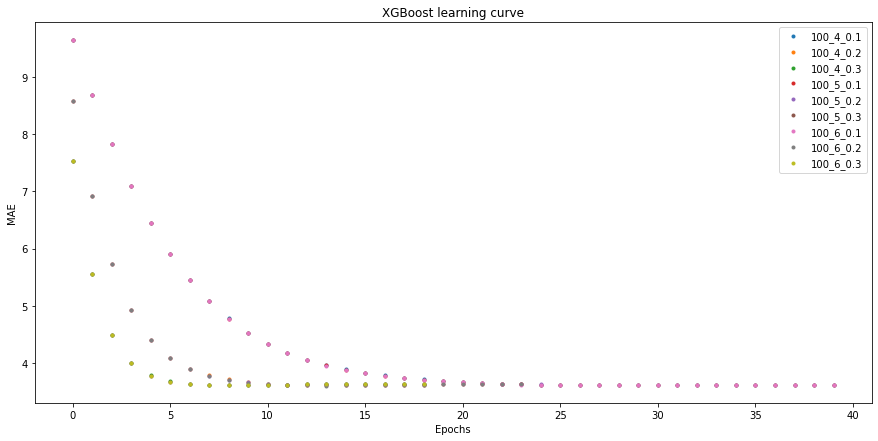

In [52]:
XGBoost_valid_mae = 100  # Find the best mae of validation set
iteration = 0
_,ax=plt.subplots(1,1, figsize = (15,7)) 
for max_depth in [4, 5, 6]:
    for learning_rate in [0.1, 0.2, 0.3]:
        epochs = len(results[iteration]['validation_1']['mae'])
        ax.plot(range(0, epochs), results[iteration]['validation_1']['mae'], '.',label=f'{n_estimators}_{max_depth}_{learning_rate}')
        if results[iteration]['validation_1']['mae'][-1] < XGBoost_valid_mae:
            XGBoost_valid_mae = results[iteration]['validation_1']['mae'][-1]
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
        iteration += 1

ax.set_xlabel('Epochs')
ax.set_ylabel('MAE')
ax.set_title('XGBoost learning curve')
ax.legend() 

* The mae will converge to a point for different parameters

In [53]:
print("Best parameters for XGBoost Model: ", best_params)
print("Best performance mae on validation dataset:", XGBoost_valid_mae)

Best parameters for XGBoost Model:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}
Best performance mae on validation dataset: 3.614062625044584


In [54]:
# Delete all unnecessary model and rename the best model to 'XGBoost.json'
for max_depth in [4, 5, 6]:
    for learning_rate in [0.1, 0.2, 0.3]:
        if max_depth != best_params['max_depth'] or learning_rate != best_params['learning_rate']:
            file_name = f"XGBoost{max_depth}_{learning_rate}.json"
            os.remove(file_name)
os.rename(f"XGBoost{best_params['max_depth']}_{best_params['learning_rate']}.json",'XGBoost.json')

In [55]:
xgb_model.load_model('XGBoost.json') # Load the best model
xgb_pred = xgb_model.predict(x_test1) # Make prediction on testing data
XGBoost_test_mae = mae(xgb_pred,y_test1)
print("XGBoost have the mae:",mae(xgb_pred,y_test1),"on the test dataset")

XGBoost have the mae: 3.6334936947005563 on the test dataset


<a id = "Sequential_Models_for_Forecasting_Time_Series_Data"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### ➟ Sequential Models for Forecasting Time Series Data

* According to jounal [A Review on Deep Sequential Models for Forecasting Time Series Data](https://doi.org/10.1155/2022/6596397), among LSTM, ANN and TCNN, LSTM is the most popular, follow by ANN and TCNN. Therefore, we decided to develop ANN and LSTM model to forecast our dataset. 
<br><br>
* Additionally, since GRU is always been mentioned together with LSTM, we intend to try out GRU and compare the result with LSTM
<br><br>
* Lastly, since bidirectional LSTM OR GRU (can capture the sequence information in both direction) and (always have better prediction than unidirectional LSTM or GRU model), we will use bidirectional model instead of unidirectional model

<a id = "ANN"></a>
### i) ANN

* A forecasting method that is based on simple mathematical models of the brain.
* **Allow complex nonlinear relationships** between the response variable and its predictors.

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from keras.callbacks import EarlyStopping

> **Hyperparameter Selection (Build Model)**

|Hyperparameter|Selection|Explanation|
|:--|:--|:--|
|Activation Function|ReLU |- It does not activate all the neurons at the same time.<br> - The neurons will only be deactivated if the output of the linear transformation is less than 0 <br> - It improve neural networks by speeding up the training|

In [57]:
def create_ANN(input_feature=2):
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = [input_feature])) #2 input columns (u_in, u_out) - input layer
    model.add(Dense(64, activation = 'relu')) #Adding second hidden layer
    model.add(Dense(64, activation = 'relu')) #Adding third hidden layer
    model.add(Dense(1)) # Adding output layer (1 output result) 
    return model

In [58]:
ann_model = create_ANN()
print(ann_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________
None


> **Hyperparameter Selection (Compile Model)**

|Hyperparameter|Selection|Explanation|
|:--|:--|:--|
|loss function|mean absolute error|- Measures accuracy for continuous variables. |
|optimizer|Adam |- Computationally efficient, can speed up the process<br>- Works well on problems with noisy or sparse gradient<br>- Works well with large dataset and large parameters|

In [59]:
ann_model.compile(loss = 'mean_absolute_error', optimizer = 'Adam')

> __Early Stopping in Neural Network__

* Early stopping allows you to specify an arbitrary large number of training epochs and **stop training once the model performance stops improving on a hold out validation dataset**.

* **Hyperparameter Selection (Early Stopping)**

|Hyperparameter|Selection|Explanation|
|:--|:--|:--|
|monitor|val_loss |- Monitor the difference between current validation loss and the previous validation loss.|
|patience|2 |- Training will stop after there is no improvement for 2 epochs.<br>- Setting patience to 10% of epochs is sufficient enough. |
|min_delta|0 |- Min_delta is a threshold to whether quantify the change in monitored value as an improvement or not.<br>- If the difference of loss is below min_delta, it is quantified as no improvement.<br>- Better to leave it as 0 since we're interested in when loss becomes worse.|
|mode|auto |- Mode argument depends on what direction your monitored quantity has (is it supposed to be decreasing or increasing).<br>- Since we monitor loss, we can use min, but, let's leave keras handle that for us and set that to auto.|

In [60]:
#Initialize callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2, min_delta = 0, mode = 'auto')]

> **Hyperparameter Selection (Fit Model)**

|Hyperparameter|Selection|Explanation|
|:--|:--|:--|
|batch size|128|- The model will see 128 samples per gradient update<br>- Setting large batch size because we have large dataset<br>- Choosing batch size of powers of 2 can boost the process because of the way of memory works in GPU|
|epochs|20 |- Setting to 20 iteration over entire x and y data<br>- Setting number of epochs that is at least 3 times the number of columns of the data is better|

In [61]:
#Fit the training dataset into ANN model
history = ann_model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_valid, y_valid), callbacks=callbacks, verbose=1)

Epoch 1/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.7715 - val_loss: 3.6143
Epoch 2/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.6321 - val_loss: 3.6216
Epoch 3/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.6037 - val_loss: 3.5360
Epoch 4/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.5376 - val_loss: 3.5001
Epoch 5/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.5180 - val_loss: 3.4864
Epoch 6/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.5127 - val_loss: 3.4810
Epoch 7/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.5115 - val_loss: 3.4910
Epoch 8/20
4375/4375 [==============================] - 6s 1ms/step - loss: 3.5096 - val_loss: 3.4851


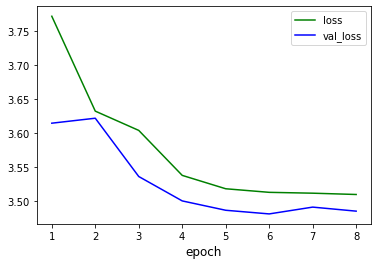

In [62]:
plt.plot(range(1,len(history.history['loss']) + 1), history.history['loss'],label="loss", color = 'g')
plt.plot(range(1,len(history.history['loss']) + 1), history.history['val_loss'],label="val_loss", color = 'b')
plt.xlabel('epoch', fontsize = 12)
plt.legend()

In [63]:
ANN_valid_mae = history.history['val_loss'][-1]
print("Last mae on validation dataset:", ANN_valid_mae)

# Evaluate model on test dataset
ANN_test_mae = ann_model.evaluate(x_test1, y_test1)  
print("ANN have the mae:",ANN_test_mae,"on the test dataset")

Last mae on validation dataset: 3.4850916862487793
5000/5000 [==============================] - 6s 1ms/step - loss: 3.5013
ANN have the mae: 3.501307487487793 on the test dataset


In [64]:
#Save model
ann_model.save("ANN.h5")

### Feature Engineering for ANN

Based on theories, neural networks work better in higher dimensional data, we try to do some feature engineering obtained from [kaggle](https://www.kaggle.com/code/konradb/ts-6-deep-learning-for-ts-rnn-and-friends) to leverage data to create new variables that are not in the training set with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

**Aim of feature engineering**

* Higher efficiency of the model
* Ease the algorithms that fit the data
* Easier for algorithms to detect patterns in the data
* Greater flexibility of the features

In [65]:
x_train_fe = pd.DataFrame(x_train, columns = ['u_in', 'u_out'])

In [66]:
#Simple feature engineering
xgr = x_train_fe['u_in']
x_train_fe['u_in_cumsum'] = xgr.cumsum()
x_train_fe['u_in_lag1'] = xgr.shift(1)
x_train_fe['u_in_lag_back1'] = xgr.shift(-1)
x_train_fe.fillna(0, inplace = True)

x_train_fe = pd.get_dummies(x_train_fe) #Convert categorical variable into dummy/indicator variables

In [67]:
x_train_fe.head()

,u_in,u_out,u_in_cumsum,u_in_lag1,u_in_lag_back1
0,0.000833,0.0,0.000833,0.000000,0.183830
1,0.183830,0.0,0.184664,0.000833,0.225093
2,0.225093,0.0,0.409757,0.183830,0.228088
3,0.228088,0.0,0.637845,0.225093,0.253559
4,0.253559,0.0,0.891403,0.228088,0.272599


In [68]:
x_train_fe.shape

(560000, 5)

* We have added 3 extra input variables onto x_train through feature engineering.
* Now, we will do the same things on x_valid and x_test1

In [69]:
# For the x_valid we will do the same things as above
x_valid_fe = pd.DataFrame(x_valid, columns = ['u_in', 'u_out'])

xgr_valid = x_valid_fe['u_in']
x_valid_fe['u_in_cumsum'] = xgr_valid.cumsum()
x_valid_fe['u_in_lag1'] = xgr_valid.shift(1)
x_valid_fe['u_in_lag_back1'] = xgr_valid.shift(-1)
x_valid_fe.fillna(0, inplace = True)

x_valid_fe = pd.get_dummies(x_valid_fe) #Convert categorical variable into dumm

In [70]:
# For the x_test1 we will do the same things as above
x_test1_fe = pd.DataFrame(x_test1, columns = ['u_in', 'u_out'])

xgr_test1 = x_test1_fe['u_in']
x_test1_fe['u_in_cumsum'] = xgr_test1.cumsum()
x_test1_fe['u_in_lag1'] = xgr_test1.shift(1)
x_test1_fe['u_in_lag_back1'] = xgr_test1.shift(-1)
x_test1_fe.fillna(0, inplace = True)

x_test1_fe = pd.get_dummies(x_test1_fe) #Convert categorical variable into dummy/indicator variables

In [71]:
ann_model2 = create_ANN(input_feature=5)
print(ann_model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                384       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
#Compile model
ann_model2.compile(loss = 'mae', optimizer = 'Adam')

In [73]:
#Fit the training data with feature engineering into ANN model
history = ann_model2.fit(x_train_fe, y_train, batch_size = 128, epochs = 20, validation_data = (x_valid_fe, y_valid), callbacks=callbacks, verbose=1)

Epoch 1/20
4375/4375 [==============================] - 7s 1ms/step - loss: 18.5275 - val_loss: 6.7260
Epoch 2/20
4375/4375 [==============================] - 6s 1ms/step - loss: 6.0128 - val_loss: 5.0056
Epoch 3/20
4375/4375 [==============================] - 6s 1ms/step - loss: 5.1947 - val_loss: 5.0469
Epoch 4/20
4375/4375 [==============================] - 6s 1ms/step - loss: 5.1106 - val_loss: 5.0755


In [74]:
#Evaluate model on test dataset
ANN_test_mae1 = ann_model2.evaluate(x_test1_fe, y_test1)
print("Last mae on validation dataset:", history.history['val_loss'][-1])  
print("ANN have the mae:",ANN_test_mae1,"on the test dataset")

5000/5000 [==============================] - 6s 1ms/step - loss: 5.1236
Last mae on validation dataset: 5.075502872467041
ANN have the mae: 5.1236395835876465 on the test dataset


> Unfortunately, according to the results, we did not obtain better prediction using feature engineering. 

<a id = "Bidirectional_LSTM"></a>
### ii) Bidirectional LSTM

In [75]:
# Import all required library
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,Input,Bidirectional,Dropout
from tensorflow.keras import metrics,losses
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

<a id = "LSTM_GRU_input_format"></a>

In [76]:
# reshape (x_train,x_test1,x_valid) to 3D and (y_train,y_test1,y_valid) to 2D so can feed into LSTM framework
x_train_ = x_train.reshape(-1,80,2)
y_train_ = y_train.reshape(-1,80)
x_test1_ = x_test1.reshape(-1,80,2)
y_test1_ = y_test1.reshape(-1,80)
x_valid_ = x_valid.reshape(-1,80,2)
y_valid_ = y_valid.reshape(-1,80)

print("For train dataset: ",x_train_.shape,y_train_.shape)
print("For test dataset: ",x_test1_.shape,y_test1_.shape)
print("For validation dataset: ",x_valid_.shape,y_valid_.shape)

For train dataset:  (7000, 80, 2) (7000, 80)
For test dataset:  (2000, 80, 2) (2000, 80)
For validation dataset:  (1000, 80, 2) (1000, 80)


> We have use the following link as reference for creating the __Stack Bidirectional LSTM__: <br>
1. For overall architecture of model, we refer to 4 links: &emsp;[First link](https://www.kaggle.com/code/smoschou55/skip-connection-ventilator-pressure-tf)&emsp; [Second link](https://www.kaggle.com/code/pavfedotov/optuna-optimized-keras-base-model)&emsp; [Third link](https://www.kaggle.com/code/konradb/ts-6-deep-learning-for-ts-rnn-and-friends)&emsp; [Fourth link](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/ )
2. [For dropout rate in dropout layer](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
3. [For understanding selu](https://towardsdatascience.com/gentle-introduction-to-selus-b19943068cd9)

In [77]:
# Create and return a stack Bidirectional LSTM with 3 Birectional LSTM, 1 Dropout layer and 2 Dense layer
def create_stack_BiLSTM(input_shape = (80,2),dropout_rate=0.1,optimizers ='adam',losses='mae'):
    model = Sequential()
    model.add(Input(shape = input_shape))
    model.add(Bidirectional(LSTM(180, return_sequences = True)))
    model.add(Bidirectional(LSTM(120, return_sequences = True)))
    model.add(Bidirectional(LSTM(60, return_sequences = True)))
    model.add(Dropout(dropout_rate))        # Add a dropout layer to minimize overfitting
    model.add(Dense(32, activation="selu")) # To due with vanishing gradient problem and dying relu, we use 'selu' instead of 'relu'
    model.add(Dense(1)) # Output
    print(model.summary()) # print out the summary of the model
    model.compile(optimizer = optimizers, loss=losses)
    return model

In [78]:
# Create arrays to store the results
loss = []
val_loss = []

* We will start training the model using __'Adam' optimizer with different dropout rate__
* Large batch size (200) is selected as we assume that each 200 breath represents a patient
* It is reasonable to assume that each patient will definitely contribute to n breath, where n is an positive integer
* Additionally, since each breath is only about 2.5 to 2.9 seconds, it is reasonable to assume that each patient contribute to 500(2.5 * 200) to 580(2.9 * 200) seconds of breath 

In [79]:
# Use callback to stop training when `val_loss` is no longer improving
callbacks = [EarlyStopping(
        monitor="val_loss",min_delta=1e-2,
        patience=2, # "no longer improving for at least 2 epochs"
        verbose=1,)]

# Train the model with difference droupout rate and store the loss & val_loss in arrays
for droupout_rate in [.1,.2,.3,.4,.5]:
    print("\nFollowing is the model of Bidirectional LSTM with droupout rate:",droupout_rate)
    model = create_stack_BiLSTM(dropout_rate=droupout_rate)
    history = model.fit(x_train_, y_train_, batch_size=200, epochs=10,validation_data=(x_valid_,y_valid_),callbacks=callbacks)
    model.save(f"LSTM{int(droupout_rate*10)}.h5")
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])


Following is the model of Bidirectional LSTM with droupout rate: 0.1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 80, 360)          263520    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 80, 240)          461760    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 80, 120)          144480    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 80, 120)           0         
                                                                 
 dense_8 (Dense)             (None, 80, 32)       

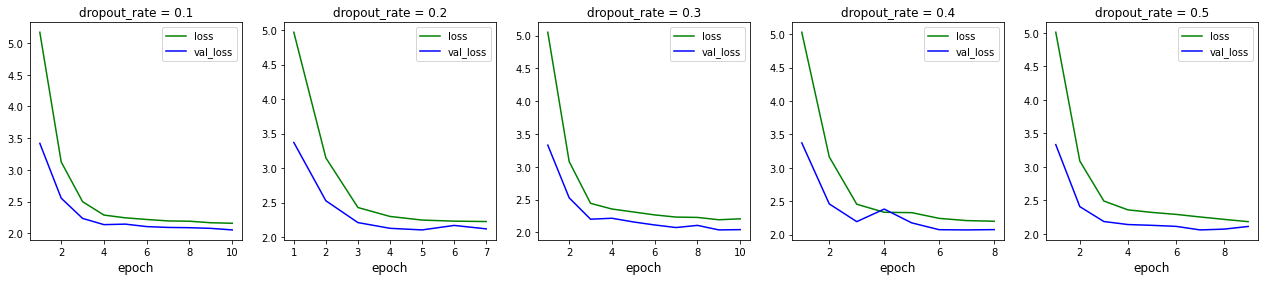

In [80]:
def plot_dropout(ax, n):   
    ax[n].plot(range(1,len(val_loss[i])+1), loss[n],label="loss", color = 'g')
    ax[n].plot(range(1,len(val_loss[i])+1), val_loss[n],label="val_loss", color = 'b')
    ax[n].set_title(f'dropout_rate = {(n+1)/10}', fontsize = 12)
    ax[n].set_xlabel('epoch', fontsize = 12)
    ax[n].legend()

# Compare loss and val_loss for difference dropout rate
_,ax=plt.subplots(1,5, figsize = (22,4)) 
for i in range(5):
    plot_dropout(ax,i)

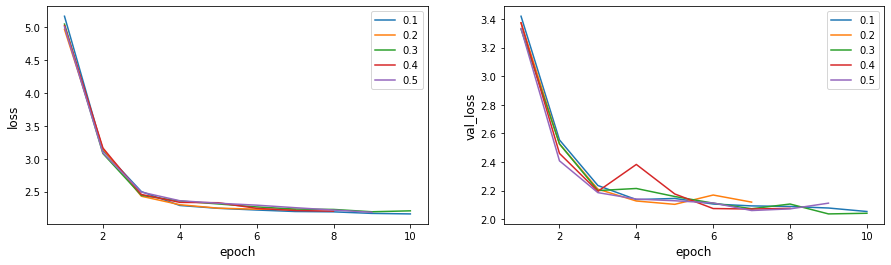

In [81]:
# Compare loss OR val_loss for different dropout rate
_,ax=plt.subplots(1,2, figsize = (15,4)) 

for i in range(5):
    ax[0].plot(range(1,len(loss[i])+1),loss[i],label=f'{(i+1)/10}')
ax[0].set_xlabel('epoch',fontsize=12)
ax[0].set_ylabel('loss',fontsize=12)
ax[0].legend()

for i in range(5):
    ax[1].plot(range(1,len(val_loss[i])+1),val_loss[i],label=f'{(i+1)/10}')
ax[1].set_xlabel('epoch',fontsize=12)
ax[1].set_ylabel('val_loss',fontsize=12)
ax[1].legend()

* According to the graph above, the dropout rate of 0.3 has the best result compared with 5 other different dropout rate using Adam optimizer
* However, dropout rate of 0.1 also produces a good result. The difference of the last mae between model with dropout_rate 0.3 and 0.1 is only about 0.01.
* Therefore, we will use dropout rate of 0.1 to continue testing on 4 commonly used optimizers ['SGD', 'Adadelta', 'RMSProp', 'Adam'] rather than dropout rate 0.3 as the larger the dropout rate, the longer the model needs to be trained
* Furthermore, since model with Adam optimizer has already been trained above, we will only train the other 3 and observe the result.
#### Note that the result may vary a little when retraining the model (rerun program), and dropout rate 0.3 may not be the best mae after retraining. However, dropout rate of 0.1 will retain good mae on the validation dataset.

In [82]:
optimizers = ['SGD','Adadelta','RMSProp']
for i in range(len(optimizers)):
    print("\nFollowing is the model of Bidirectional LSTM with optimizer:",optimizers[i])
    model = create_stack_BiLSTM(dropout_rate=0.1,optimizers = optimizers[i])
    history = model.fit(x_train_, y_train_, batch_size=200, epochs=10,validation_data=(x_valid_,y_valid_),callbacks=callbacks)
    model.save(f"LSTM{int(i+6)}.h5")
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])


Following is the model of Bidirectional LSTM with optimizer: SGD
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_15 (Bidirecti  (None, 80, 360)          263520    
 onal)                                                           
                                                                 
 bidirectional_16 (Bidirecti  (None, 80, 240)          461760    
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 80, 120)          144480    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 80, 120)           0         
                                                                 
 dense_18 (Dense)            (None, 80, 32)           

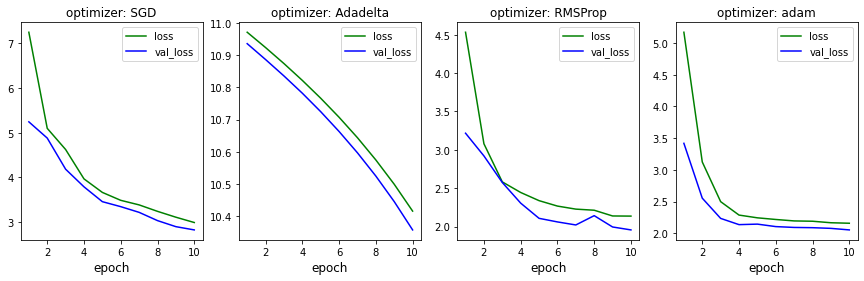

In [83]:
optimizers = ['SGD','Adadelta','RMSProp','adam']

def plot_optimizer(ax, n, initial_num):
    ax[n].plot(range(1,len(loss[n+initial_num])+1), loss[n+initial_num],label='loss', color = 'g')
    ax[n].plot(range(1,len(loss[n+initial_num])+1), val_loss[n+initial_num],label="val_loss", color = 'b')
    ax[n].set_title(f'optimizer: {optimizers[n]}', fontsize = 12)
    ax[n].set_xlabel('epoch', fontsize = 12)
    ax[n].legend()

# Compare loss and val_loss for difference optimizer
_,ax=plt.subplots(1,4, figsize = (15,4))  
for i in range(3):
    plot_optimizer(ax, i, 5)

# For Adam optimizer, its result is at loss[0], val_loss[0]
plot_optimizer(ax, 3, -3)

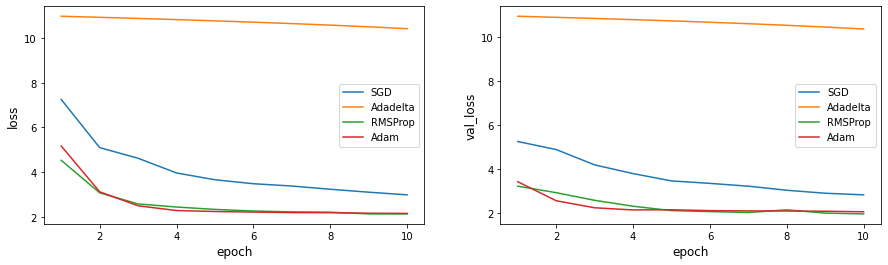

In [84]:
# Compare loss OR val_loss for different optimizer
_,ax=plt.subplots(1,2, figsize = (15,4)) 

for i, optimizer_name in ((5,'SGD'),(6,'Adadelta'),(7,'RMSProp'),(0,'Adam')):
    ax[0].plot(range(1,len(loss[i])+1),loss[i],label=optimizer_name)
ax[0].set_xlabel('epoch',fontsize=12)
ax[0].set_ylabel('loss',fontsize=12)
ax[0].legend()

for i, optimizer_name in ((5,'SGD'),(6,'Adadelta'),(7,'RMSProp'),(0,'Adam')):
    ax[1].plot(range(1,len(val_loss[i])+1),val_loss[i],label=optimizer_name)
ax[1].set_xlabel('epoch',fontsize=12)
ax[1].set_ylabel('val_loss',fontsize=12)
ax[1].legend()

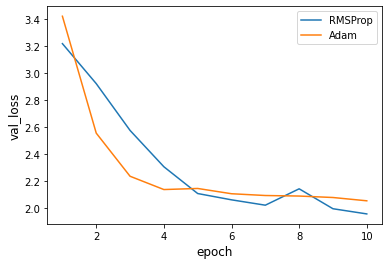

In [85]:
# Compare val_loss for RMSProp and Adam to see which one perform better
for i, optimizer_name in ((7,'RMSProp'),(0,'Adam')):
    plt.plot(range(1,len(val_loss[i])+1),val_loss[i],label=optimizer_name)
plt.xlabel('epoch',fontsize=12)
plt.ylabel('val_loss',fontsize=12)
plt.legend()

* In conclusion, dropout rate of 0.1 and RMSProp optimizer can obtain the best result
* Note that when we execute the model with (dropout rate= 0.1, optimizer = RMSProp/Adam) multiple times, either RMSProp or Adam can obtain better results. It is because one algorithm may be stuck at local min for a long time until the 'callback - EarlyStopping' is activated to stop the training. This can be shown in 2 figures below: 
> Example of the case that Adam optimizer work better:

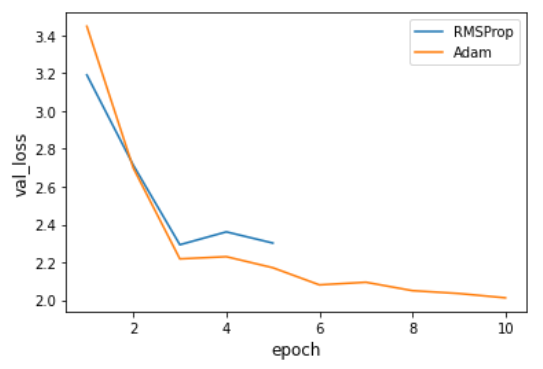
> Example of the case that RMSProp optimizer work better:

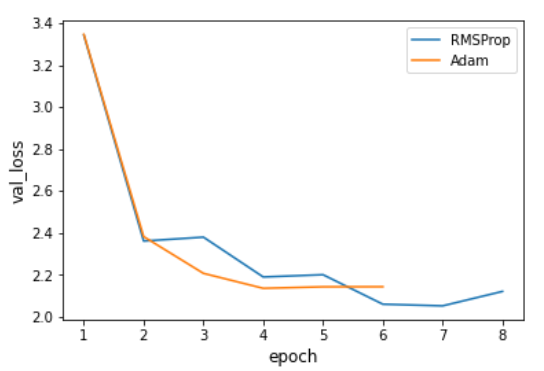

* So, it is interesting that the same algorithm will produce different result due to the callback function.
* In this case, we may remove the EarlyStopping but it turns out that we need more computation time and the degree of overfitting may increase. Therefore, we will remain our settings by using callback and we can conclude that it is very important to select a good callback too.

In [86]:
LSTM_valid_mae = 100
min_index = 0
for num,valid_loss_list in enumerate(val_loss):
    if valid_loss_list[-1] < LSTM_valid_mae: # If found a lower mae
        LSTM_valid_mae = valid_loss_list[-1]
        min_index = num

print("Last best mae on validation dataset:", LSTM_valid_mae,f"(Model LSTM{min_index + 1})")

Last best mae on validation dataset: 1.9562312364578247 (Model LSTM8)


From easy refer, let's summarize relationship between file name & different parameters on model 
- LSTM1.h5 is model with droupout_rate = 0.1, optimizer = 'Adam'
- LSTM2.h5 is model with droupout_rate = 0.2, optimizer = 'Adam'
- LSTM3.h5 is model with droupout_rate = 0.3, optimizer = 'Adam'
- LSTM4.h5 is model with droupout_rate = 0.4, optimizer = 'Adam'
- LSTM5.h5 is model with droupout_rate = 0.5, optimizer = 'Adam'
- LSTM6.h5 is model with droupout_rate = 0.1, optimizer = 'SGD'
- LSTM7.h5 is model with droupout_rate = 0.1, optimizer = 'Adadelta'
- LSTM8.h5 is model with droupout_rate = 0.1, optimizer = 'RMSProp'

In [87]:
# Delete all unnecessary model and rename the final model to 'LSTM.h5'
for num in range(1,9):
    file_name = 'LSTM'+str(num)+'.h5'
    if num == min_index + 1:
        os.rename(file_name,'LSTM.h5')
        print(f"We have save the {file_name} as our final model")
    else: 
        os.remove(file_name)

We have save the LSTM8.h5 as our final model


<a id = "Bidirectional_GRU"></a>
### iii) Bidirectional GRU

* We will use the settings obtained from LSTM to train GRU
* Even though it is may not be the best settings, but it will be a good settings as GRU is highly similar to LSTM

In [88]:
# Create and return a stack Bidirectional GRU with 3 Birectional GRU, 1 Dropout layer and 2 Dense layer
def create_stack_BiGRU(input_shape = (80,2),dropout_rate=0.1,optimizers ='RMSProp',losses='mae'):
    model = Sequential()
    model.add(Input(shape = input_shape))
    model.add(Bidirectional(GRU(180, return_sequences = True)))
    model.add(Bidirectional(GRU(120, return_sequences = True)))
    model.add(Bidirectional(GRU(60, return_sequences = True)))
    model.add(Dropout(dropout_rate))        # Add a dropout layer to minimize overfitting
    model.add(Dense(32, activation="selu")) # To due with vanishing gradient problem and dying relu, we use 'selu' instead of 'relu'
    model.add(Dense(1)) # Output
    print(model.summary())
    model.compile(optimizer = optimizers, loss=losses)
    return model

In [89]:
model = create_stack_BiGRU()
history = model.fit(x_train_, y_train_, batch_size=200, epochs=10,validation_data=(x_valid_,y_valid_),callbacks=callbacks)
model.save("GRU.h5")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_24 (Bidirecti  (None, 80, 360)          198720    
 onal)                                                           
                                                                 
 bidirectional_25 (Bidirecti  (None, 80, 240)          347040    
 onal)                                                           
                                                                 
 bidirectional_26 (Bidirecti  (None, 80, 120)          108720    
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 80, 120)           0         
                                                                 
 dense_24 (Dense)            (None, 80, 32)            3872      
                                                     

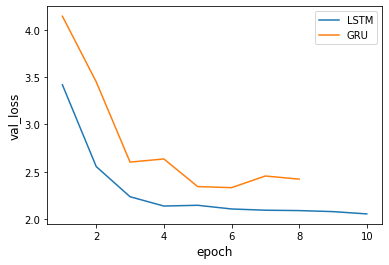

In [90]:
# Compare the validation loss of LSTM and GRU
plt.plot(range(1,len(val_loss[0])+1),val_loss[0],label="LSTM")
plt.plot(range(1,len(history.history['val_loss'])+1),history.history['val_loss'],label="GRU")
plt.xlabel('epoch',fontsize=12)
plt.ylabel('val_loss',fontsize=12)
plt.legend()

In [91]:
GRU_valid_mae = np.min(history.history['val_loss'])
print("GRU's last mae on validation dataset:", GRU_valid_mae)

GRU's last mae on validation dataset: 2.331019401550293


In [92]:
# Compare the test loss of LSTM and GRU
GRU_model = tf.keras.models.load_model("GRU.h5")
LSTM_model = tf.keras.models.load_model("LSTM.h5")

GRU_test_mae = GRU_model.evaluate(x_test1_, y_test1_)
LSTM_test_mae = LSTM_model.evaluate(x_test1_, y_test1_)

print("\nGRU  have the mae:",GRU_test_mae,"on the test dataset")
print("LSTM have the mae:",LSTM_test_mae,"on the test dataset")

63/63 [==============================] - 47s 726ms/step - loss: 1.9709

GRU  have the mae: 2.422877311706543 on the test dataset
LSTM have the mae: 1.9708908796310425 on the test dataset


* In conclusion, Stack Bidirectional LSTM has a higher performance than the Stack Bidirectional GRU with the same settings

<a id = "Statistical_Model"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### ➟ Statistical Model for Forecasting Time Series Data

<a id = "ARIMA"></a>
### i) Auto Regressive Integrated Moving Average (ARIMA)

In [93]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.api as sm

> We have use the following links as reference for creating __ARIMA__: <br>
1. For overall architecture of model, we refer to 2 links: &emsp;[First link](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)&emsp; [Second link](https://people.duke.edu/~rnau/411arim.htm#:~:text=A%20nonseasonal%20ARIMA%20model%20is,errors%20in%20the%20prediction%20equation.)&emsp;
2. For setting the parameters, we refer to 2 links: [First link](https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06#:~:text=A%20partial%20autocorrelation%20is%20a,relationships%20of%20intervening%20observations%20removed)  &emsp;[Second link](https://people.duke.edu/~rnau/arimrule.htm)

ARIMA is a univariate time series forecasting model. In our case, we will only use a variable, 'pressure' for training and forecasting the 'pressure' in the future based on the 'pressure' in the past. 
<br>To build a ARIMA model, we need to take two/three parameter (D,P) OR (D,Q) OR (D,P,Q) into account:<br>
1. D = number of differencing transformations required by the time series to be stationary.
  - D = 0 implies no transformation is needed.
  - D = 1 implies 1 transformation is needed and so on...
2. P = AR term/ period of lag
  - P = 0 implies no previous time series is used in the autoregressive portion of the calculation.
  - P = 1 imples 3 previous periods of our time series is used and so on... 
3. Q = MA term/lag of the error component
  - error component is a part of the time series that is not explained by trend or seasonality

#### a) Check stationarity of the dataset
  - For ARIMA models, the time-series which has a trend or seasonality component has to be made stationary to be predicted by ARIMA models. 
  - In our case, Argumented Dicky-Fuller (ADF) test is used to determine the stationarity of the time-series of the data. 
  - The Argumented Dicky-Fuller (ADF) test's null hypothesis states that the time-series is not stationary. 
  - If the __p-values < significance level (0.05)__, then __the null hypothesis of the ADF test is rejected (means the dataset is stationary).__
  - Different size of subsets are taken instead of the whole set of data as the time taken to run the code will exponentionally increase. 

In [94]:
result1 = adfuller(dataset.pressure[:800])
print("When we use 800 data:")
print('Augmented Dickey-Fuller Statistic:',result1[0])  
print('p-value:',result1[1])  

print("\nWhen we use 8000 data:")
result2 = adfuller(dataset.pressure[:8000])
print('Augmented Dickey-Fuller Statistic:', result2[0])  
print('p-value:', result2[1])  

When we use 800 data:
Augmented Dickey-Fuller Statistic: -5.091894360091183
p-value: 1.455477020096412e-05

When we use 8000 data:
Augmented Dickey-Fuller Statistic: -16.106118956031487
p-value: 5.07070154325657e-29


* By observing the output, the p-value of ADF test decreases as more data is decreasing.
* Therefore the time-series of the data is stationary, __D = 0 as no differentiaton of the data is needed.__

#### b) Find  AR term (P) and MA term (Q) by Partial autocorrelation and Autocorrelation graph 

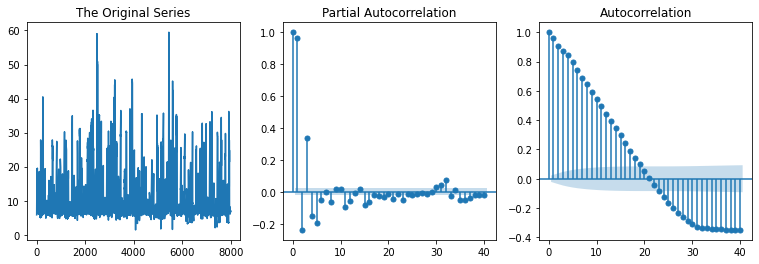

In [95]:
# Finding the AR term(p) value
fig, axes = plt.subplots(1,3, figsize = (13,4))
axes[0].plot(dataset.pressure[:8000])
axes[0].set_title('The Original Series')
plot_pacf(dataset.pressure[:8000], ax = axes[1])
plot_acf(dataset.pressure[:8000], ax = axes[2]) 
plt.show()

|Based on [article1](https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06#:~:text=A%20partial%20autocorrelation%20is%20a,relationships%20of%20intervening%20observations%20removed), AR terms is chosen if |Based on [article2](https://people.duke.edu/~rnau/arimrule.htm), AR terms is chosen if |
|:--|:--|
|ACF  plots shows autocorrelation decrease towards zero|PACF displays a sharp cutoff|
|PACF plot cuts off quickly towards zero|The series appears slightly "underdifferenced" <br>(For undestand under/over differenced, please refer [link](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/))|
|ACF of a stationary series shows positive at lag-1|Lag-1 autocorrelation is positive|
​
* The data fulfils all the conditions, thus AR term is chosen. __(P = 1 or more)__

|Based on [article1](https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06#:~:text=A%20partial%20autocorrelation%20is%20a,relationships%20of%20intervening%20observations%20removed), MA terms is chosen if |Based on [article2](https://people.duke.edu/~rnau/arimrule.htm), MA terms is chosen if |
|:--|:--|
|PACF decreases more gradually|PACF displays a sharp cutoff|
|ACF that drops sharply after a few lags|The series appears slightly "overdifferenced"|
|Negatively Autocorrelated at lag 1|Lag-1 autocorrelation is negative|
​
* Since the data fulfils only some the conditions, thus MA term is not chosen. __(Q = 0)__

#### c) Create & train the model

In [96]:
# We will choose P value [1,2,3], D = 0, Q = 0 to train our model and test on the validation dataset
d = 0
q = 0
residual_list = []
mae_test = []
mae_valid = []
for p in [1,2,3]:
    ARIMA_model = sm.tsa.arima.ARIMA(y_train, order=(p,d,q))
    ARIMA_model_fit = ARIMA_model.fit()
    residual_list.append(pd.DataFrame(ARIMA_model_fit.resid))  # Append the residual of the model
    joblib.dump(ARIMA_model_fit, f"ARIMA{p}.joblib") # Saving the model 
    
    # Making predictions from the end of the training samples and compute 'mae' on test & validation dataset
    pred_y = ARIMA_model_fit.forecast(steps = len(y_test1) + len(y_valid))
    mae_test.append(mae(pred_y[:len(y_test1)], y_test1))
    mae_valid.append(mae(pred_y[len(y_test1):], y_valid))
    
    print("When P =",p,"D =",d,"Q =",q)
    print(ARIMA_model_fit.summary(),end='\n\n') # Print out the summary of model

When P = 1 D = 0 Q = 0
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               560000
Model:                 ARIMA(1, 0, 0)   Log Likelihood            -1232320.062
Date:                Wed, 29 Jun 2022   AIC                        2464646.123
Time:                        01:33:49   BIC                        2464679.831
Sample:                             0   HQIC                       2464655.621
                             - 560000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2450      0.133     84.817      0.000      10.985      11.505
ar.L1          0.9633      0.000   3086.492      0.000       0.963       0.964
sigma2         4.7744      0.

* Since all of the value in the column of P>|z| < 0.05, all the respective X to be significant.

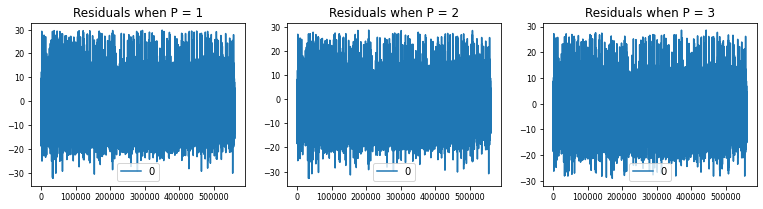

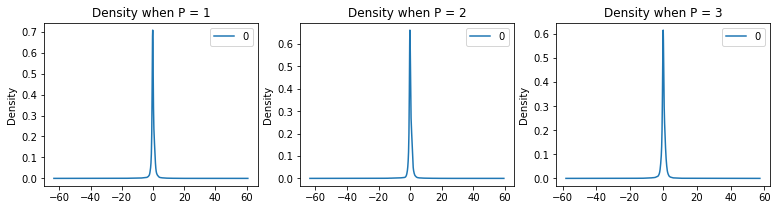

In [97]:
# Plotting residual graph and Density plot of residuals
_, axes1 = plt.subplots(1,3, figsize = (13,3))
_, axes2 = plt.subplots(1,3, figsize = (13,3))
for i in range(3):
    residual_list[i].plot(title=f"Residuals when P = {i+1}",ax=axes1[i],fontsize=8)
    residual_list[i].plot(kind='kde', title=f'Density when P = {i+1}', ax=axes2[i])

* From the residual report, when P =1/2/3, the mean can be approximated to zero and this proves that there is no biasness in the data.

In [98]:
print(mae_valid)
print(np.max(mae_valid) == np.min(mae_valid))
ARIMA_valid_mae = mae_valid[0]

[6.198268521164978, 6.198268521164978, 6.198268521164978]
True


* Since 3 of them have the same mae on validation dataset, we cannot conclude that which one is better than another, so we will save ARIMA (1,0,0) since we prefer simpler one rather than complex one

In [99]:
# Delete all unnecessary model and rename the final model to 'ARIMA.joblib'
for p in [2,3]:
    file_name = f"ARIMA{p}.joblib" 
    os.remove(file_name)
os.rename("ARIMA1.joblib","ARIMA.joblib")

In [100]:
ARIMA_test_mae = mae_test[0]
print("ARIMA have the mae:",ARIMA_test_mae,"on the test dataset")

ARIMA have the mae: 6.24749446117164 on the test dataset


<a id = "VAR"></a>
### ii) Vector Auto Regressive models (VAR)

> We have use the following links as reference for creating __VAR__: <br>
1. For granger causuality test, we refer to [this link](https://www.statology.org/granger-causality-test-in-python/)
2. For Johansen Test, we refer to [this link](https://blog.quantinsti.com/johansen-test-cointegration-building-stationary-portfolio/)
3. For overall architecture of model, we refer to [this links](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/)

In [101]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson

VAR is a generalized version of auto regression model. Difference with ARIMA, VAR can be used when two or more time series influence each other and can predict multivariable timeseries data. In order to build a VAR model, we need to follow the some steps:

#### a) Granger’s Causality Test
* To test whether if each time series variable in the system affects each other.

In [102]:
print("Granger Causality test to check if u_in is predictive of pressure")
print(grangercausalitytests(dataset[['pressure', 'u_in']], maxlag = 1))
print("\nGranger Causality test to check if u_out is predictive of pressure")
print(grangercausalitytests(dataset[['pressure', 'u_out']], maxlag = 1))

Granger Causality test to check if u_in is predictive of pressure

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=185251.1782, p=0.0000  , df_denom=799996, df_num=1
ssr based chi2 test:   chi2=185251.8729, p=0.0000  , df=1
likelihood ratio test: chi2=166628.4512, p=0.0000  , df=1
parameter F test:         F=185251.1782, p=0.0000  , df_denom=799996, df_num=1
{1: ({'ssr_ftest': (185251.17821689023, 0.0, 799996.0, 1), 'ssr_chi2test': (185251.87291228204, 0.0, 1), 'lrtest': (166628.45122462977, 0.0, 1), 'params_ftest': (185251.17821688976, 0.0, 799996.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000027FB92DACD0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000027FB92DA3A0>, array([[0., 1., 0.]])])}

Granger Causality test to check if u_out is predictive of pressure

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=110299.1627, p=0.0000  , df_denom=799996, df_num=1
ssr b

The null hypothesis of Granger Causality Test is that the time series of variable 1 __does not__ affect the time series of variable 2. The null hypothesis is rejected if corresponding p-value __< 0.05__ or accepted otherwise.

|Predictor variable|Target variable| F statistics | P-value | Null Hypothesis|
|:-:|:-:|:-:|:-:|:-:|
|u_in|Pressure|185251.1782|0|Rejected|
|u_out|Pressure|110299.1627|0|Rejected|

* Since both of the p-value < 0.05, knowing the value in variable 'u_in' and 'u_out' is useful for predicting the future value of 'pressure'.

#### b) Johansen Cointegration test 
* To determine if two or more time series variables are cointegrated. 
* When two or more time series are cointegrated, it means they have a statistically significant relationship between them.
* It is important to perform this test as VAR is built based on the premise that all the time series variables are cointegrated.
* For Johansen Cointegration test, the null hypothesis is that there are no cointegrating equations between the variables

In [103]:
result = coint_johansen(dataset[['u_in', 'u_out', 'pressure']], 0, 1)
traces = result.lr1
cvts = result.cvt[:,2]
print("Variable : Test Stat > C(99%) ")
for col, trace, cvt in zip (dataset.columns, traces, cvts):
    print(col.center(8),":" , str(np.round(trace, 2)).center(9), ">", np.round(cvt,2))

Variable : Test Stat > C(99%) 
  u_in   : 262409.14 > 35.46
 u_out   :  65693.23 > 19.93
pressure :  23599.3  > 6.63


* Since all the Test Stat is > C(99%), the null hypothesis can be rejected at 99% confident interval.
* It means that all these 3 variables are cointegrated.

#### c) Check stationarity of the dataset
  - For VAR models, the time-series which has a trend or seasonality component has to be made stationary to be predicted by VAR models. (Same as ARIMA model)
  - In our case, Argumented Dicky-Fuller (ADF) test is used again to determine the stationarity of the time-series of the data.
  - The Argumented Dicky-Fuller (ADF) test's null hypothesis states that the time-series is not stationary. 
  - If the __p-values < significance level (0.05)__, then __the null hypothesis of the ADF test is rejected (mean the dataset is stationary).__

In [104]:
result1 = adfuller(dataset.u_in[:800])
result2 = adfuller(dataset.u_out[:800])
print("When we use 800 data:")
print("p-value for 'u_in'  variable:",result1[1])  
print("p-value for 'u_out' variable:",result2[1])  

When we use 800 data:
p-value for 'u_in'  variable: 1.4110355610241524e-06
p-value for 'u_out' variable: 0.00012530585849346835


In [105]:
result1 = adfuller(dataset.u_in[:8000])
result2 = adfuller(dataset.u_out[:8000])
print("When we use 8000 data:")
print("p-value for 'u_in'  variable:",result1[1])  
print("p-value for 'u_out' variable:",result2[1])  

When we use 8000 data:
p-value for 'u_in'  variable: 1.5322457489606535e-27
p-value for 'u_out' variable: 0.0


- From the test result in the ARIMA model, we already know that 'pressure' has stationary time series.
- By observing the output, the p-value of ADF test decreases as more data is decreasing.
- Since variables 'u_in', 'u_out' has p-values < significance level(0.05), thus the null hypothesis of the ADF test is rejected.
- Therefore, all variables has stationary time series, __D = 0 as no diffentiation of the data is needed.__

#### d) Find the P value in VAR model

In [106]:
# Selecting the P value for VARIMA
VAR_model = VAR(train_dataset)
summary = VAR_model.select_order(maxlags=10)
print(summary.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -1.932      -1.932      0.1449      -1.932
1       -7.872      -7.872   0.0003812      -7.872
2       -7.965      -7.965   0.0003474      -7.965
3       -8.517      -8.516   0.0002001      -8.516
4       -8.536      -8.536   0.0001962      -8.536
5       -8.550      -8.549   0.0001935      -8.550
6       -8.558      -8.557   0.0001919      -8.558
7       -8.580      -8.579   0.0001877      -8.580
8       -8.587      -8.586   0.0001864      -8.587
9       -8.593      -8.591   0.0001854      -8.592
10     -8.598*     -8.596*  0.0001844*     -8.598*
--------------------------------------------------


From the output above, we can observe that AIC, BIC, FPE and HQIC are decreasing as the number of lags increases. During lag 3, there is a significant decrease in AIC value compared to the previous lag. Thus, the number of lags, __P is set to 2.__ However, in order to test whether P is a correct value to choose, we would like to try out P = 3, P = 4 for validation purpose

#### e) Create and train the model

In [107]:
mae_test = []
mae_valid = []
residual_list = []
P_list = [2,3,4]
for P in P_list:
    VAR_model_fit = VAR_model.fit(P)
    # print(VAR_model_fit.summary()) # If you are interested, you can print out the summary of model
    
    residual_list.append(VAR_model_fit.resid)  # Append the residual for later analysis
    
    # Starting prediction using previous P number of data from the back of train_dataset
    data_pred = train_dataset[-P:]
    
    """ We will first predict on test_dataset1, then predict on valid_dataset due to the order of spliting dataset 
        (0-70% of data is training), (70-90% of data is testing), (90-100% of data is validation)"""
    
    # Making predictions (on test_dataset1) one by one using previous P number of data 
    for i in range(len(test_dataset1)):
        # Output a matrix with size (1,3), 1st col = predicted value of 'u_in', 2nd col = predicted value of 'u_out', 3rd col = predicted value of 'pressure'
        pred = VAR_model_fit.forecast(y = data_pred[i:,:], steps=1)  
        
        # Use actual 'u_in','u_out' value and the predicted 'pressure' to predict next output
        data_pred = np.append(data_pred, test_dataset1[i:i+1,:], axis=0) 
        data_pred[-1,2] = pred[0,2]  

    
    # Making predictions (on valid_dataset) one by one using previous P number of data 
    for j in range(len(valid_dataset)):
        # Output a matrix with size (1,3), 1st col = predicted value of 'u_in', 2nd col = predicted value of 'u_out', 3rd col = predicted value of 'pressure'
        pred = VAR_model_fit.forecast(y = data_pred[i+j:,:], steps=1)  
        
        # Use actual 'u_in','u_out' value and the predicted 'pressure' to predict next output
        data_pred = np.append(data_pred, valid_dataset[j:j+1,:], axis=0) 
        data_pred[-1,2] = pred[0,2]
    
    mae_test.append(mae(data_pred[P:len(test_dataset1)+P,2],y_test1))
    mae_valid.append(mae(data_pred[len(test_dataset1)+P:,2],y_valid))
    
    # Saving the model
    filename = f"VAR{P}.joblib"
    joblib.dump(VAR_model_fit, filename)

#### f) Durbin watson test
* To check for autocorrelation/serial correlation between the residuals. 
* If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model
* No significant serial correlation occurs if the value is approaches 2. 
* Positive serial correlation occurs if the values is close to 0.
* Negative serial correlation occurs if the values is close to 4. 

In [108]:
for num in range(len(P_list)):
    print(f"When P = {P_list[num]}:")
    res = durbin_watson(residual_list[num])
    for column, x in zip(dataset.columns,res):
        print(column.center(8), ":", np.round(x, 2))
    print('')   

When P = 2:
  u_in   : 2.01
 u_out   : 2.0
pressure : 1.79

When P = 3:
  u_in   : 2.07
 u_out   : 2.0
pressure : 2.09

When P = 4:
  u_in   : 1.99
 u_out   : 2.0
pressure : 2.0



* By observing the values obtain, we can conclude that there is no significant serial correlation that occurs as the values of each variable
obtained from Durbin watson test are close to 2.

In [109]:
for num,P in enumerate(P_list):
    print(f"When P = {P}, the model have mae : {mae_valid[num]} on validation dataset")

When P = 2, the model have mae : 3.199711515558072 on validation dataset
When P = 3, the model have mae : 3.2500221895836345 on validation dataset
When P = 4, the model have mae : 3.2589161797460258 on validation dataset


* As predicted, model with P = 2 obtain the best result among the three

In [110]:
VAR_valid_mae = mae_valid[0]
# Delete all unnecessary model and rename the final model to 'VAR.joblib'
os.rename("VAR2.joblib","VAR.joblib")
os.remove("VAR3.joblib" )
os.remove("VAR4.joblib" )

In [111]:
VAR_test_mae = mae_test[0]
print("VAR have the mae:",VAR_test_mae,"on the test dataset")

VAR have the mae: 3.2329601390640765 on the test dataset


* Note that since it have make use of variable 'u_in' and 'u_out', it have a better performance than the ARIMA model which has a mae of 6.25 on test dataset

<a id = "Ensemble_Learning"></a>
### ➟ Ensemble Learning

* Before we use ensemble learning on our models, let's see the performance for each of the model in a table

In [112]:
valid_mae_list = [KNN_valid_mae, RF_valid_mae, XGBoost_valid_mae, ANN_valid_mae, LSTM_valid_mae, GRU_valid_mae, ARIMA_valid_mae, VAR_valid_mae]
test_mae_list = [KNN_test_mae, RF_test_mae, XGBoost_test_mae, ANN_test_mae, LSTM_test_mae, GRU_test_mae, ARIMA_test_mae, VAR_test_mae]
df_mae_summary = pd.DataFrame({"Model":["KNN","RF",'XGBoost','ANN','LSTM','GRU',"ARIMA","VAR"],
                                     "valid_mae":valid_mae_list,
                                     "test_mae":test_mae_list})
df_mae_summary.head(8)

,Model,valid_mae,test_mae
0,KNN,3.624902,3.647712
1,RF,3.694213,3.739288
2,XGBoost,3.614063,3.633494
3,ANN,3.485092,3.501307
4,LSTM,1.956231,1.970891
5,GRU,2.331019,2.422877
6,ARIMA,6.198269,6.247494
7,VAR,3.199712,3.232960


> Summary from table above
* From the table above, we know that Bidirectional LSTM perform the best, followed by Bidirectional GRU, VAR, ANN, XGBoost, KNN, RF, ARIMA.
* It is not surprising that LSTM and GRU perform the best as they are variants of Recurrent Neural Network that can deal with sequential data
* Besides that, VAR is performing better than ANN as VAR fully utilizes the statistical method that can forecast multivariable timeseries data.
* Surprisingly, KNN's performance is near to XGBoost as XGBoost excels in forecasting time series data while KNN is just a simple algorithm to calculate the average/weighted value from its K-neighbours. This phenomenon can be explained due to the number of lags, P (From ARIMA, VAR) is very small (less than 3), which means that the data is not highly affected by its previous values.
* Lastly, ARIMA has the worst performance as it does not fully utilize the information of 'u_in' and 'u_out' to predict 'pressure'.
<br><br>

> Start ensemble learning and observe its result
* Now, let's implement ensemble learning and observe its results
* For [KNN](#KNN_test), we need copy its model which it is testing on test dataset, note that we do not save the KNN model as it will just store all the data and training is performed when there is a new query (predicting).
* For other models, we just load it from the files.

In [113]:
# Create OR Load all the model
KNN_model = KNeighborsRegressor(n_neighbors = list(KNN_random)[np.argmin(vld_lst)]['n_neighbors'], weights = list(KNN_random)[np.argmin(vld_lst)]['weights'])
KNN_model.fit(x_train, y_train)

RF_model = joblib.load("RF.joblib")
XGBoost_model = xgb.Booster()
XGBoost_model.load_model('XGBoost.json')

ANN_model = tf.keras.models.load_model("ANN.h5")
GRU_model = tf.keras.models.load_model("GRU.h5")
LSTM_model = tf.keras.models.load_model("LSTM.h5")
ARIMA_model = joblib.load("ARIMA.joblib")
VAR_model = joblib.load("VAR.joblib")

* We will weight each of the model differently based on its weight by mapping it into some univariate function that has the following characteristics
  - The lower the x, the higher the f(x)
  - For x in range( min(valid_mae) , max(valid_mae)), f(x) is larger than 0 (means that all models must contribute in predicting the pressure)
* Then, we need to divide each value by sum of f(x) to obtain the ratio the model contribute in ensemble learning
  
* We find out the $f(x)$ = $csch^n(x)$ = $\frac{1}{sinh^n(x)}$ is a good choice for us, so we will try to use it with different n to weight the model.

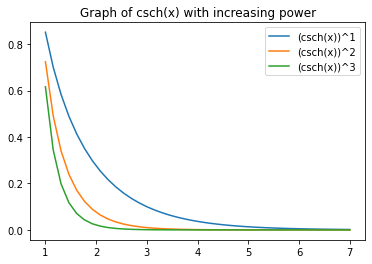

In [114]:
x = np.linspace(1,7,40)
y = 1/np.sinh(x)
y1 = 1/np.sinh(x)**2
y2 = 1/np.sinh(x)**3
plt.plot(x,y,label = "(csch(x))^1")
plt.plot(x,y1,label = "(csch(x))^2")
plt.plot(x,y2,label = "(csch(x))^3")
plt.title("Graph of csch(x) with increasing power")
plt.legend()

In [115]:
power_list = [1,1.2,1.4,1.6,1.8,2,2.5,3,4,5]
ratio_of_contribute = []
for power in power_list:
    ROF = 1/np.sinh(valid_mae_list) ** power / np.sum(1/np.sinh(valid_mae_list) ** power)
    ratio_of_contribute.append(ROF)
    col_name = f'ROF with power {power}'
    df_mae_summary[col_name] = ROF
df_mae_summary.head(8)

,Model,valid_mae,test_mae,ROF with power 1,ROF with power 1.2,ROF with power 1.4,ROF with power 1.6,ROF with power 1.8,ROF with power 2,ROF with power 2.5,ROF with power 3,ROF with power 4,ROF with power 5
0,KNN,3.624902,3.647712,0.067612,0.054989,0.043851,0.034375,0.026553,0.020257,0.009880,0.004629,9.527793e-04,1.879922e-04
1,RF,3.694213,3.739288,0.063078,0.050595,0.039791,0.030762,0.023434,0.017632,0.008306,0.003759,7.218161e-04,1.328717e-04
2,XGBoost,3.614063,3.633494,0.068350,0.055710,0.044522,0.034977,0.027077,0.020702,0.010152,0.004782,9.950591e-04,1.984771e-04
3,ANN,3.485092,3.501307,0.077775,0.065052,0.053349,0.043008,0.034165,0.026805,0.014022,0.007045,1.668268e-03,3.786443e-04
4,LSTM,1.956231,1.970891,0.365745,0.416930,0.466011,0.512019,0.554358,0.592784,0.672438,0.732669,8.158600e-01,8.708009e-01
5,GRU,2.331019,2.422877,0.248750,0.262521,0.271652,0.276325,0.276975,0.274198,0.256515,0.230494,1.745626e-01,1.267180e-01
6,ARIMA,6.198269,6.247494,0.005154,0.002505,0.001194,0.000559,0.000258,0.000118,0.000016,0.000002,3.216394e-08,4.837386e-10
7,VAR,3.199712,3.232960,0.103537,0.091699,0.079630,0.067975,0.057179,0.047504,0.028671,0.016621,5.239376e-03,1.583065e-03


* Based on the table above, as the power increases, more focus will be placed on the model that performs better (eg. ROF of LSTM increase when power increase)
* Now, we can use our model to predict the result on x_test1 and x_valid. For LSTM and GRU, we will reshape the input size to (-1, 80, 2), [(process at here)](#LSTM_GRU_input_format) as both of these models require specific input size.

In [116]:
def Ensemble_learning(x_data, ratio_of_contribute):
    KNN_pred = KNN_model.predict(x_data)
    RF_pred = RF_model.predict(x_data)
    XGBoost_pred = XGBoost_model.predict(xgb.DMatrix(x_data))
    ANN_pred = ANN_model.predict(x_data)  # Output a size of (n,1)
    ANN_pred = ANN_pred[:,0]  # Convert the size to (n,)

    # For LSTM and GRU
    LSTM_pred = LSTM_model.predict(x_data.reshape(-1,80,2)) # Output a size of (n,m,1)
    LSTM_pred = LSTM_pred.reshape(LSTM_pred.shape[0] * LSTM_pred.shape[1])
    GRU_pred = GRU_model.predict(x_data.reshape(-1,80,2))   # Output a size of (n,m,1)
    GRU_pred = GRU_pred.reshape(GRU_pred.shape[0] * GRU_pred.shape[1])
    
    # For ARIMA
    ARIMA_pred = ARIMA_model.forecast(steps = len(x_data))
    
    # For VAR
    P = 2
    data_pred = train_dataset[-2:]  # Predict from last 2 col of data
    VAR_pred = []
    for i in range(len(x_data)):  # Predict each value 1 by 1 based on the previous value
        pred = VAR_model.forecast(y = data_pred[i:,:], steps=1)               # Output a matrix with size (1,3), 1st col = predicted value of 'u_in', 2nd col = predicted value of 'u_out', 3rd col = predicted value of 'pressure'
        data_pred = np.append(data_pred, np.array(list(x_data[i,:]) + [pred[0][2]])[None,:] , axis=0)  # Use actual 'u_in','u_out' value and the predicted 'pressure' to predict next output
        VAR_pred.append(pred[0][2])
    
    list_pred_value = np.array([KNN_pred, RF_pred, XGBoost_pred, ANN_pred, LSTM_pred, GRU_pred, ARIMA_pred, VAR_pred])
    final_pred = 0
    for i in range(8):
        final_pred += list_pred_value[i] * ratio_of_contribute[i]
    return final_pred
        

In [117]:
for num in range(len(power_list)):
    pred_valid = Ensemble_learning(x_valid, ratio_of_contribute[num]) 
    print(f"When power = {str(power_list[num]).center(3)}, ensemble learning has mae:",mae(pred_valid,y_valid),"on validation dataset")

32/32 [==============================] - 22s 649ms/step
When power =  1 , ensemble learning has mae: 2.297606474959444 on validation dataset
32/32 [==============================] - 20s 631ms/step
When power = 1.2, ensemble learning has mae: 2.2218664677505857 on validation dataset
32/32 [==============================] - 20s 620ms/step
When power = 1.4, ensemble learning has mae: 2.1600863656109506 on validation dataset
32/32 [==============================] - 20s 621ms/step
When power = 1.6, ensemble learning has mae: 2.1109274678982857 on validation dataset
32/32 [==============================] - 20s 624ms/step
When power = 1.8, ensemble learning has mae: 2.0725931186498583 on validation dataset
32/32 [==============================] - 20s 628ms/step
When power =  2 , ensemble learning has mae: 2.043115672313194 on validation dataset
32/32 [==============================] - 20s 624ms/step
When power = 2.5, ensemble learning has mae: 1.9972005286316743 on validation dataset
32/32 [=

* From above, we can conclude that the higher the power, the lower the mae on validation dataset until it reaches a certain point (as it is decreasing slower). From this, we can conclude that performance of ensemble learning highly relies on the ratio of contribution of the model with best performance (LSTM). 

In [118]:
pred_test = Ensemble_learning(x_test1, ratio_of_contribute[-1]) 
print("Ensemble learning has mae:",mae(pred_test,y_test1),"on test dataset")

63/63 [==============================] - 40s 640ms/step
Ensemble learning has mae: 1.9649065863879582 on test dataset


In [119]:
# Visualize all the result again
valid_mae_list.append(mae(pred_valid,y_valid))
test_mae_list.append(mae(pred_test,y_test1))
df_mae_summary = pd.DataFrame({"Model":["KNN","RF",'XGBoost','ANN','LSTM','GRU',"ARIMA","VAR","Ensemble Learning"],
                                     "valid_mae":valid_mae_list,
                                     "test_mae":test_mae_list})
df_mae_summary.head(9)

,Model,valid_mae,test_mae
0,KNN,3.624902,3.647712
1,RF,3.694213,3.739288
2,XGBoost,3.614063,3.633494
3,ANN,3.485092,3.501307
4,LSTM,1.956231,1.970891
5,GRU,2.331019,2.422877
6,ARIMA,6.198269,6.247494
7,VAR,3.199712,3.232960
8,Ensemble Learning,1.950271,1.964907


* Note that ensemble learning performs slightly better than LSTM model.
###### * * Sometimes, ensemble learning will perform slightly worse when the whole program is rerun * *

<a id = "Conclusion"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Conclusion

The overall progress and findings are listed as below:
- In Data Analysis, we found that only variable 'u_in' and 'u_out' are relavant in predicting pressure value, thus we exclude all other variables such as 'id', 'breath_id', 'R', 'C', and 'time_step' in predicting pressure values.
- In Data Preprocessing, we have removed all breaths with negative pressure, extracted subset of data from original dataset, and normalized the predictor variable in range [0,1]
- In Create & Train the model, we have successfully implemented 8 models to forecast the 'pressure' and use ensemble learning on these model. Among them, the best model in predicting the pressure value is Ensemble learning, followed by the LSTM model.  

# </a><div style="text-align: center"> ~ THE END ~</a> </div>